# Linear Resgression

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
# Importing the dataset and Extracting the Independent and Dependent variables
companies = pd.read_csv('1000_Companies.csv')
x = companies.iloc[:,:-1].values
y = companies.iloc[:,4:].values

In [5]:
print(x)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 ...
 [100275.47 241926.31 227142.82 'California']
 [128456.23 321652.14 281692.32 'California']
 [161181.72 270939.86 295442.17 'New York']]


In [6]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
companies.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000
999,161181.72,270939.860,295442.1700,New York,476485.43000


<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

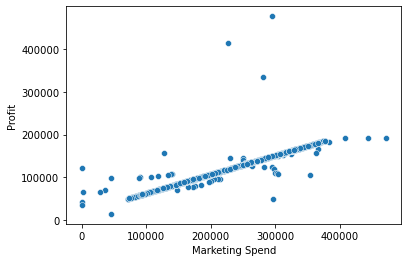

In [8]:
sns.scatterplot(data =companies,x= 'Marketing Spend',y='Profit')

<AxesSubplot:>

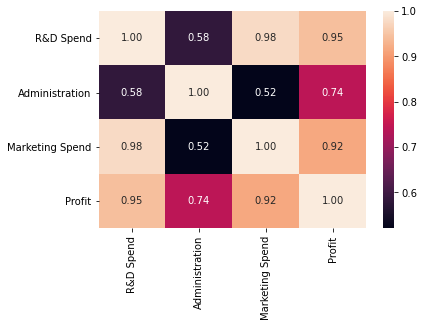

In [10]:
# Data Visualisation
# Building the Correlation matrix
sns.heatmap(companies.corr(),fmt='.2f',annot=True)

In [389]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
x[:, 3] = labelencoder.fit_transform(x[:, 3])
x

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       ...,
       [100275.47, 241926.31, 227142.82, 0],
       [128456.23, 321652.14, 281692.32, 0],
       [161181.72, 270939.86, 295442.17, 2]], dtype=object)

In [390]:
x[:, 3] = labelencoder.fit_transform(x[:, 3])
#onehotencoder = ColumnTransformer([("State", OneHotEncoder(),[3])],remainder = 'passthrough')
onehotencoder = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')

In [391]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [392]:
x = np.array(onehotencoder.fit_transform(x))

In [393]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [394]:
print(x[0])

[0.0 0.0 1.0 165349.2 136897.8 471784.1]


In [395]:
print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 ...
 [1.0 0.0 0.0 100275.47 241926.31 227142.82]
 [1.0 0.0 0.0 128456.23 321652.14 281692.32]
 [0.0 0.0 1.0 161181.72 270939.86 295442.17]]


In [396]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [397]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train[:, 3:] = sc.fit_transform(x_train[:,3:])

In [400]:
x_train

array([[1.0, 0.0, 0.0, 38385.0, 116125.9672, 142843.0015],
       [0.0, 1.0, 0.0, 125610.0, 129007.7526, 311143.8772],
       [1.0, 0.0, 0.0, 101322.0, 125420.7901, 264280.1149],
       ...,
       [1.0, 0.0, 0.0, 22876.0, 113835.5275, 112918.3436],
       [1.0, 0.0, 0.0, 66766.0, 120317.4026, 197604.2185],
       [1.0, 0.0, 0.0, 112108.0, 127013.7157, 285091.7313]], dtype=object)

In [401]:
# y_train = sc.fit_transform(y_train)
y_train

array([[ 81824.87341],
       [156340.4382 ],
       [135591.4094 ],
       [ 60065.21791],
       [142927.2094 ],
       [175826.8244 ],
       [ 87219.72342],
       [135641.8126 ],
       [169403.4076 ],
       [ 94974.98049],
       [136286.8026 ],
       [126058.372  ],
       [ 89949.14   ],
       [ 71235.93187],
       [166415.9507 ],
       [138841.9881 ],
       [126993.8211 ],
       [137670.7546 ],
       [ 78239.91   ],
       [129889.8688 ],
       [169745.1241 ],
       [108896.5127 ],
       [123671.4819 ],
       [117289.0711 ],
       [ 59981.49735],
       [126295.865  ],
       [178552.8682 ],
       [ 54119.34996],
       [124266.9    ],
       [172937.611  ],
       [ 69995.5008 ],
       [151992.0952 ],
       [134268.9664 ],
       [ 59766.21593],
       [ 85842.60573],
       [ 84782.43014],
       [ 98397.27172],
       [ 76229.26494],
       [127455.1384 ],
       [110228.3529 ],
       [ 59342.48741],
       [101119.044  ],
       [146874.0356 ],
       [158

In [402]:
y_pred = regressor.predict(x_test)
print(y_pred)

[[ 94049.98688904]
 [ 92342.88962886]
 [100440.05254477]
 [202683.23095589]
 [ 86937.96030682]
 [120941.31751566]
 [157051.12433098]
 [ 96156.73179346]
 [188578.46526129]
 [ 49371.07355733]
 [ 65454.76529088]
 [171241.05676382]
 [140528.36805801]
 [ 55924.45718154]
 [203875.74910413]
 [ 76802.80908203]
 [130779.9516067 ]
 [187676.05169603]
 [169463.78499181]
 [210452.73010654]
 [ 94619.09805699]
 [ 88891.09393359]
 [209333.28248987]
 [ 86982.02418964]
 [113098.78556446]
 [108376.06719864]
 [ 32075.72819537]
 [ 53723.15527684]
 [ 67891.32699254]
 [237101.82428125]
 [133948.12639821]
 [121510.72472975]
 [109568.54764087]
 [155457.12184775]
 [ 61723.6458947 ]
 [117921.41582144]
 [215392.46140547]
 [197377.1558878 ]
 [201385.4502865 ]
 [130058.0073899 ]
 [103613.58227483]
 [188775.08283152]
 [116502.23678831]
 [ 45579.79215585]
 [128608.74738307]
 [ 55041.36471832]
 [181068.9519889 ]
 [ 81068.93632549]
 [182710.51558143]
 [146917.33839247]
 [214201.03426841]
 [201341.40311491]
 [ 99001.535

In [403]:
# calculating the coefficients
print(regressor.coef_)

[[ 0.01257701 -0.00846779 -0.00410921  0.58420659  0.25004793  0.23487239]]


In [404]:
#calculating the intercept_
print(regressor.intercept_)

[-0.00028812]


In [405]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred) # kiem tra do tin cay cua mo hinh

0.7144634209430178

# Logictic Regression

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://machinelearningcoban.com/assets/LogisticRegression/activation.png")

link : https://viblo.asia/p/logistic-regression-bai-toan-co-ban-trong-machine-learning-924lJ4rzKPM

* dùng chủ yếu trong bài toán classification
* Logistic Regression là 1 thuật toán phân loại được dùng để gán các đối tượng cho 1 tập hợp giá trị rời rạc (như 0, 1, 2, ...). Một ví dụ điển hình là phân loại Email, gồm có email công việc, email gia đình, email spam, ... Giao dịch trực tuyến có là an toàn hay không an toàn, khối u lành tính hay ác tình. Thuật toán trên dùng hàm sigmoid logistic để đưa ra đánh giá theo xác suất. Ví dụ: Khối u này 80% là lành tính, giao dịch này 90% là gian lận, ...

##  hàm sigmoid
Nhận xét:
* Hàm liên tục và luôn đưa ra giá trị trong khoảng (0, 1)
* Có đạo hàm tại mọi điểm nên có thể dùng gradient descent

Về cơ bản thì chúng ta sẽ có các bước sau cho 1 bài toán Machine learning:
* Thiết lập model
* Thiết lập hàm mất mát Loss Function
* Tìm tham số bằng việc tối ưu loss function
* Dự đoán dữ liệu mới dựa vào loss function mới tìm được

## Hàm mất mát Loss Function 

Bây giờ chúng ta cần 1 hàm để đánh giá độ tốt của model (tức làm dự đoán)

Hàm L nhỏ khi giá trị model gần với giá trị thật và rất lớn khi model dự đoán sai, hay nói cách khác L càng nhỏ thì model dự đoán càng gần với giá trị thật. => Bài toán toán quy về tìm giá trị nhỏ nhất của L.

In [9]:
#Ta có hàm mất mát trên tất cả bộ dữ liệu như sau:
Image(url= "https://images.viblo.asia/full/39f2e8f2-d03b-4fc3-917b-6fa8cae579b4.png")

In [10]:
# trong Logistic Regression ta có hàm dự đoán như sau:
Image(url= "https://images.viblo.asia/full/43965a36-f47e-4f23-8d05-695a315f7ce5.png")

* đi tìm w0,w1,w2  ?

link: https://sharecs.net/thuat-toan-logistic-regression.html

In [26]:
import numpy as np
import pandas as pd

In [27]:
# bước 1: đọc file duu lieu, phan tich du lieu,chuan hoa,chia ty le train_test
df = pd.read_csv("diabetes.csv") 

In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [30]:
x = df.drop(['Outcome'],axis = 1)
y = df['Outcome']
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [31]:
# chuan hoa
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = std.fit_transform(x)
print(x)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [32]:
#chia ty le train-test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=35)
x_train

array([[-1.14185152,  0.1597866 ,  0.77001375, ..., -0.16405304,
         0.14533928, -0.78628618],
       [ 0.3429808 ,  0.09719231,  0.25303625, ...,  0.25478047,
        -0.76069632,  0.40494237],
       [-0.84488505, -0.40356202, -0.47073225, ...,  0.44515934,
        -0.17177318, -0.78628618],
       ...,
       [ 0.63994726, -0.90431634,  1.18359575, ..., -1.53478089,
        -0.85734012, -0.44593516],
       [-0.54791859, -0.40356202, -0.36733675, ..., -0.86210889,
        -1.03854724, -1.04154944],
       [-1.14185152,  0.41016376, -0.57412775, ..., -0.7098058 ,
        -0.36204066, -1.04154944]])

In [76]:
x_test[:3]

array([[-1.14185152,  0.31627232, -3.57259724, -1.28821221, -0.69289057,
         1.42243753, -0.60969039, -0.61611067],
       [ 2.12477957,  0.44146091, -3.57259724, -1.28821221, -0.69289057,
         2.57740266,  0.32050616,  0.57511787],
       [ 0.3429808 , -0.81042491,  0.14964075,  0.7818138 , -0.69289057,
         0.72438168, -0.30767852, -0.53102292]])

In [45]:
# kỹ thuật học máy LogisticRegression
#Buoc 2: chay mo hinh hoc may
from sklearn.linear_model import  LogisticRegression
#buoc 2.1: Huan luyen
log_model = LogisticRegression(max_iter = 1000).fit(x_train,y_train)
#buoc 2.2: du doan(voi tap du lieu x_test,y_test)
y_pred = log_model.predict(x_test)
print("he so W", log_model.coef_)
print("he so bias", log_model.intercept_)
print("so lop",log_model.classes_)
print("tap y du doan:")
print(y_pred)

he so W [[ 0.48403476  1.16592048 -0.32967783  0.05693058 -0.16546193  0.67479007
   0.23899718  0.20191759]]
he so bias [-0.90653009]
so lop [0 1]
tap y du doan:
[1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0
 1 1 0 0 0 0]


In [46]:
#buoc 3: danh gia mo hinh hoc dua tren ket qua du doan(voi do do doan gian acuracy,precision,recall)
from sklearn.metrics import accuracy_score
print("accuracy score:", accuracy_score(y_test,y_pred))

accuracy score: 0.7337662337662337


In [77]:
x_new1 = [[0.3429808 , -0.81042491,  0.14964075,  0.7818138 , -0.69289057,
         0.72438168, -0.30767852, -0.53102292]]
y_new1 = log_model.predict(x_new1)
y_new1

array([0], dtype=int64)

In [49]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.67      0.48      0.56        54

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.68       154
weighted avg       0.73      0.73      0.72       154



In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[87, 13],
       [28, 26]], dtype=int64)

confusion matrix phía trên đang bị ngược 
* link : https://math2it.com/hieu-confusion-matrix/ \\ https://machinelearningcoban.com/2017/08/31/evaluation/ 



* vi du ve logistic regression : https://amete.github.io/DataSciencePortfolio/Udemy/Python-DS-and-ML-Bootcamp/Logistic_Regression_Project.html

# Decision tree

link: https://www.youtube.com/watch?v=88rhJ3ow3Us

2 loại câu quyết định : classification tree và regression tree

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


* classification tree

In [76]:
df = pd.read_csv('data.csv')

In [77]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [78]:
# xem classification
df['Classification'].value_counts()
df['Classification'] = df['Classification']-1 # chuyen tu tip 1 2 thanh 0 1 (co the su dung labelencoder)

In [79]:
# tao du lieu de train model
y = df['Classification'].values.reshape(-1,1)
x = df.drop(['Classification'],axis =1)


In [80]:
print(x.shape)
print(y.shape)

(116, 9)
(116, 1)


In [81]:
print(x)

     Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  
0     7.99585  417.114  
1     4.06405  468.786  
2     9.27715  554.697  
3    12.76600  928.220 

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.1)

In [83]:
# xay dung cay
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

my_tree = DecisionTreeClassifier() 
my_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [84]:
#du doan tren du lieu test
y_pred = my_tree.predict(x_test)

cm = confusion_matrix(y_test,y_pred)

print(cm)

[[6 3]
 [0 3]]


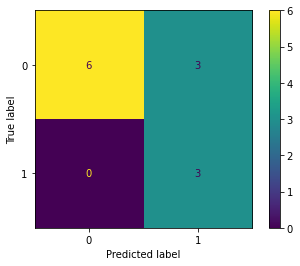

In [85]:
plot_confusion_matrix(my_tree,x_test,y_test) 

In [86]:
print(y_pred)

[1 0 0 0 0 1 1 1 1 0 0 1]


In [87]:
x_test12=[[48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114]]
y_pred12 = my_tree.predict(x_test12)
print(y_pred12)

[0]


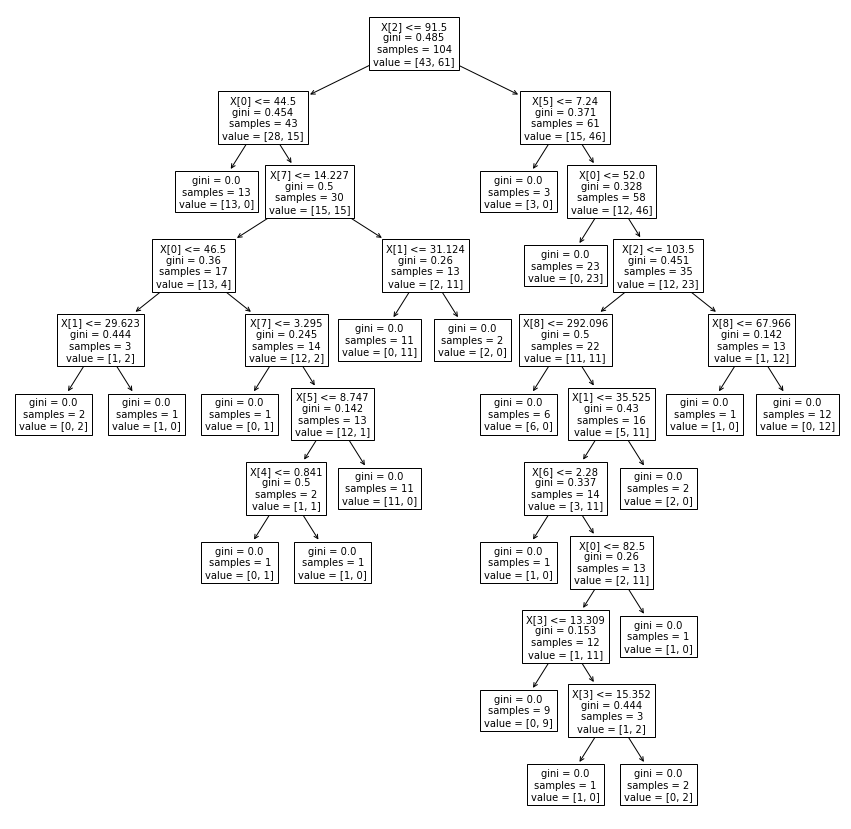

In [88]:
fig = plt.figure(figsize = (15,15))
_ = tree.plot_tree(my_tree)

In [89]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.75


In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.50      1.00      0.67         3

    accuracy                           0.75        12
   macro avg       0.75      0.83      0.73        12
weighted avg       0.88      0.75      0.77        12



* DecisionTreeRegressor

In [43]:

df1 = pd.read_csv('datareg.csv')

In [44]:
df1.head()

,Product,Cost,Profit
0,'Asset Flip',100,1000
1,'Text Based',500,3000
2,'Visual Novel',1500,5000
3,'2D Pixel Art',3500,8000
4,'2D Vector Art',5000,6500


In [51]:
#tao du lieu
x1 = df1['Cost'].values.reshape(-1,1)
y1 = df1['Profit'].values.reshape(-1,1)

In [54]:
my_tree1 = DecisionTreeRegressor()
my_tree1.fit(x1,y1)

DecisionTreeRegressor()

In [55]:
x_test1 = [[4500]]

y_pred1 = my_tree1.predict(x_test1)
print(y_pred1)

[6500.]


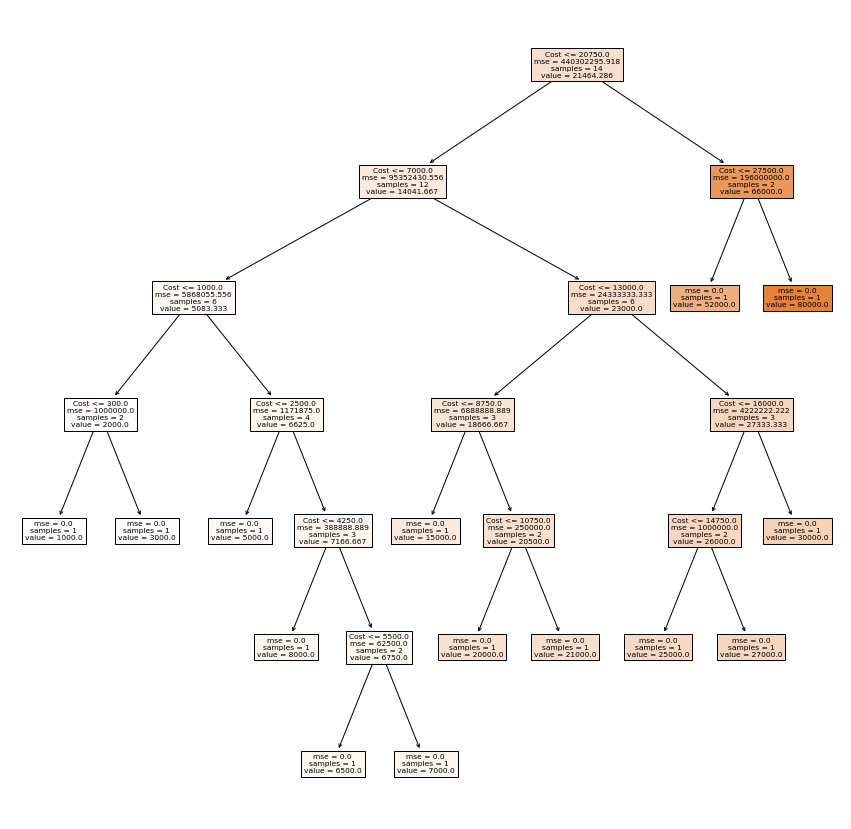

In [61]:
from sklearn import tree
fig = plt.figure(figsize = (15,15))
_ = tree.plot_tree(my_tree1,feature_names=['Cost'],class_names=['Profit'],filled=True)
# _ = giup lam mat cac so linh tinh o dau

# Random Forest

link :https://viblo.asia/p/phan-lop-bang-random-forests-trong-python-djeZ1D2QKWz

In [45]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [46]:
iris = datasets.load_iris()

In [47]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [48]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [49]:
print(iris.data[0:5])
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [53]:
data=pd.DataFrame({
'sepal length':iris.data[:,0],
'sepal width':iris.data[:,1],
'petal length':iris.data[:,2],
'petal width':iris.data[:,3],
'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [55]:
from sklearn.model_selection import train_test_split
x = data.drop(['species'],axis=1)
y = data['species']

In [56]:
x.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [58]:
from sklearn.ensemble import RandomForestClassifier
clf  = RandomForestClassifier()

In [59]:
clf.fit(x_train,y_train)
y_pred3 = clf.predict(x_test)

In [60]:
y_pred3

array([1, 2, 0, 2, 2, 0, 1, 2, 2, 1, 0, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 0,
       2, 1, 0, 1, 0, 2, 1, 1])

In [61]:
# Sau khi đào tạo, kiểm tra tính chính xác bằng cách sử dụng giá trị thực tế và dự đoán.
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,y_pred3))

Accuracy: 0.9


In [62]:
# du doan loai hoa
clf.predict([[3,5,4,2]])

array([2])

In [63]:
# -> Ở đây, 2 cho biết loại hoa Virginica


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.78      0.88      0.82         8
           2       0.92      0.85      0.88        13

    accuracy                           0.90        30
   macro avg       0.90      0.91      0.90        30
weighted avg       0.90      0.90      0.90        30



In [66]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
max_depth=None, max_features='auto', max_leaf_nodes=None,
min_impurity_decrease=0.0, min_impurity_split=None,
min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
oob_score=False, random_state=None, verbose=0,
warm_start=False)


RandomForestClassifier(n_jobs=1)

In [70]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp
#muc do quan trong cua bien day len data

petal width (cm)     0.431911
petal length (cm)    0.430586
sepal length (cm)    0.115627
sepal width (cm)     0.021877
dtype: float64

No handles with labels found to put in legend.


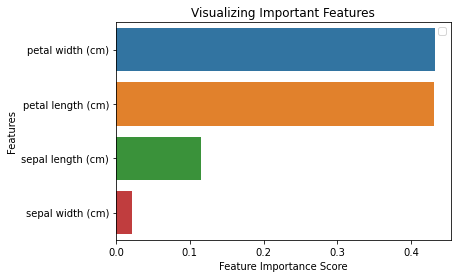

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

trong mô hình này có thể thấy được sepal width có thế loại bỏ được vì nó có tầm quan trọng thấp và chọn 3 tính năng còn lại

In [76]:

# Split dataset into features and labels

x=data[['petal length', 'petal width','sepal length']] # Removed feature "sepal length"
y=data['species'] 

# Split dataset into training set and test set`
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.70, random_state=5) # 70% training and 30% test`

In [78]:
#from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)
# prediction on test set
y_pred4=clf.predict(x_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?`
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))


Accuracy: 0.9523809523809523


Bạn có thể thấy rằng sau khi loại bỏ các tính năng ít quan trọng nhất (chiều dài sepal), độ chính xác tăng lên. Điều này là do bạn đã xóa dữ liệu gây hiểu lầm và tiếng ồn, dẫn đến độ chính xác tăng lên. Một số lượng ít tính năng hơn cũng làm giảm thời gian đào tạo.

# SVM

link:https://viblo.asia/p/gioi-thieu-ve-support-vector-machine-svm-6J3ZgPVElmB

In [109]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline


In [110]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [111]:
import warnings

warnings.filterwarnings('ignore')

In [112]:
data = 'pulsar_data.csv'

df = pd.read_csv(data)

In [113]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [114]:
df.shape

(12528, 9)

In [115]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [116]:
# xoa khoang trang dau trong tên ở một cột
df.columns = df.columns.str.strip()

In [117]:
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [118]:
# rut ngan ten moi cot
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [119]:
df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

In [120]:
df['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

In [121]:
df['target_class'].value_counts()/np.float(len(df))

0.0    0.907966
1.0    0.092034
Name: target_class, dtype: float64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          12528 non-null  float64
 1   IP Sd            12528 non-null  float64
 2   IP Kurtosis      10793 non-null  float64
 3   IP Skewness      12528 non-null  float64
 4   DM-SNR Mean      12528 non-null  float64
 5   DM-SNR Sd        11350 non-null  float64
 6   DM-SNR Kurtosis  12528 non-null  float64
 7   DM-SNR Skewness  11903 non-null  float64
 8   target_class     12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


Explore missing values in variables

In [123]:
df.mean()

IP Mean            111.041841
IP Sd               46.521437
IP Kurtosis          0.478548
IP Skewness          1.778431
DM-SNR Mean         12.674758
DM-SNR Sd           26.351318
DM-SNR Kurtosis      8.333489
DM-SNR Skewness    105.525779
target_class         0.092034
dtype: float64

In [124]:
df = df.fillna(df.mean())

In [125]:
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

In [126]:
df.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,0.988230,6.208450,29.613230,18.666010,4.535783,104.686104,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.057820,-0.188142,1.910535,14.761144,5.803063,38.128424,0.000000
50%,115.183594,46.931022,0.289934,0.203317,2.792642,19.617161,8.451097,87.795533,0.000000
75%,127.109375,50.979103,0.478548,0.932374,5.413253,26.473142,10.727927,135.774973,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


Text(0, 0.5, 'DM-SNR Skewness')

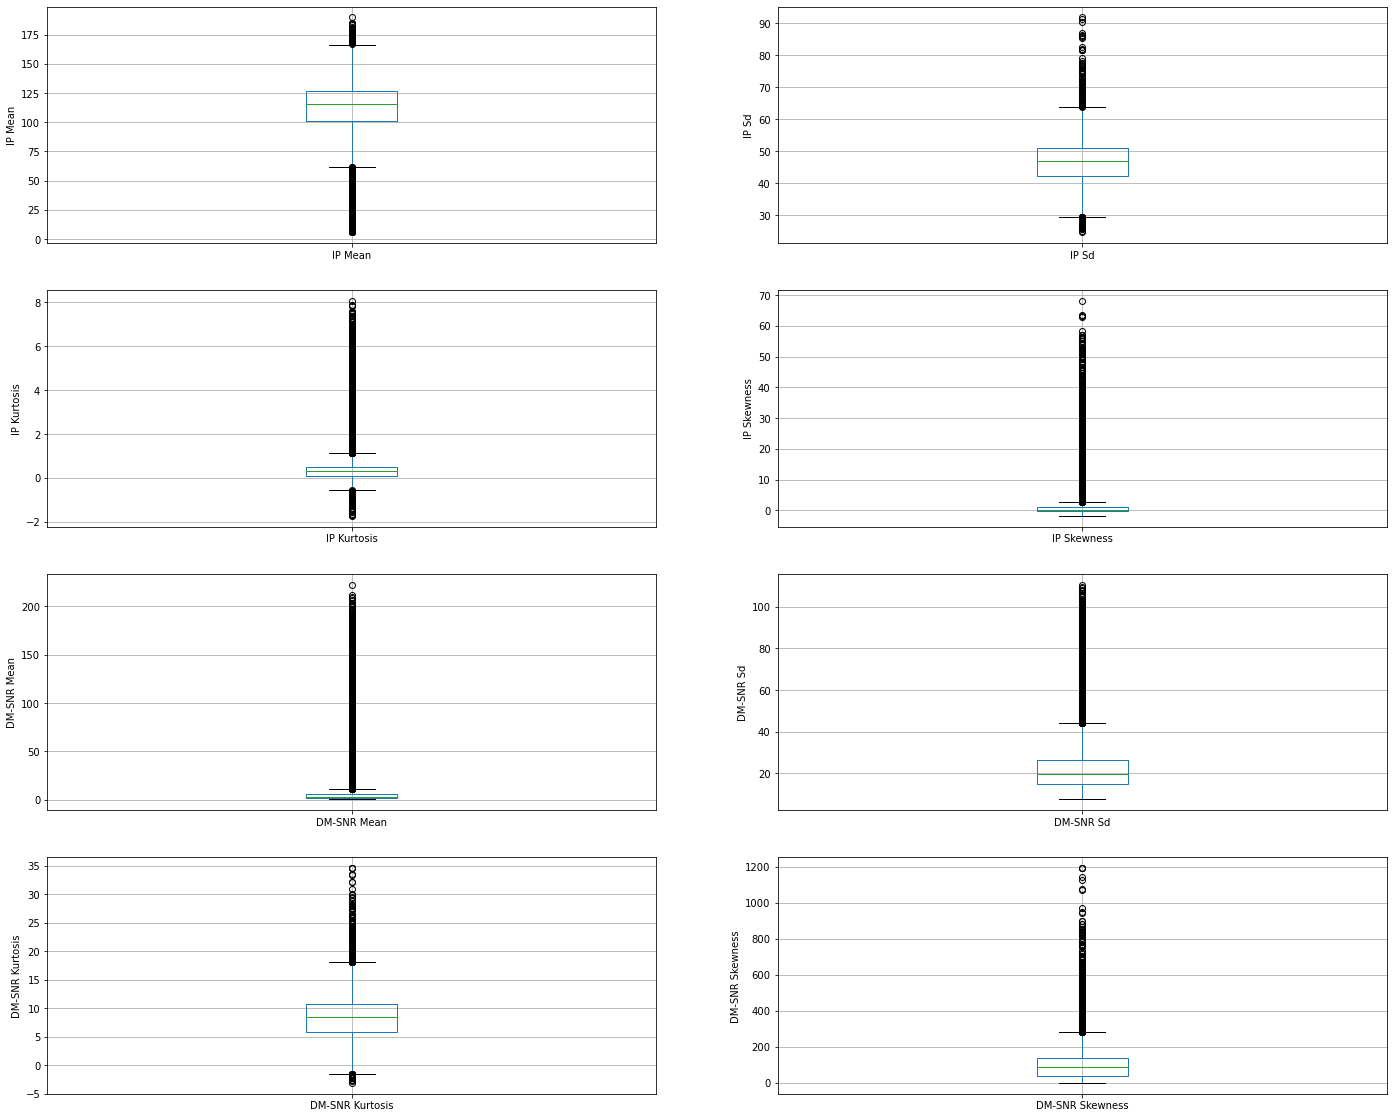

In [127]:
# draw boxplots to visualize outliers
##plt.boxplot(figsize(24,20))
from matplotlib.pyplot import figure
plt.figure(figsize=(24,20))

plt.subplot(4,2,1)
fig = df.boxplot(column = 'IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

Text(0, 0.5, 'Number of pulsar stars')

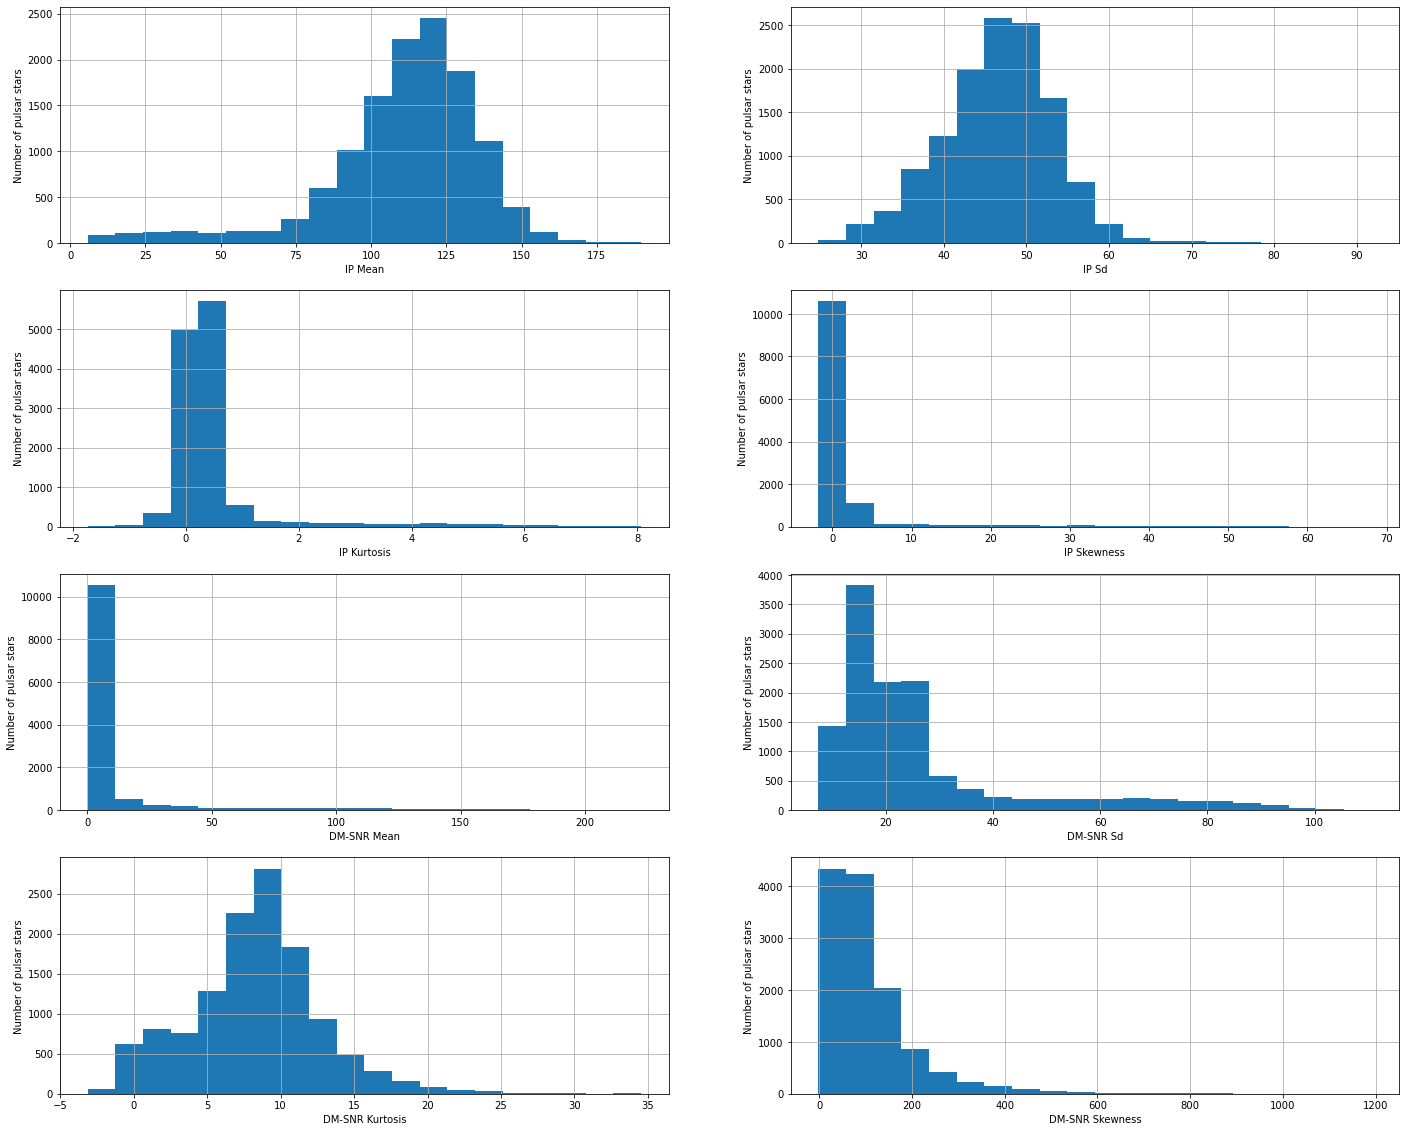

In [128]:
# plot histogram to check distribution
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

Declare feature vector and target variable

In [129]:
x5 = df.drop(['target_class'], axis=1)

y5 = df['target_class']

In [130]:
from sklearn.model_selection import train_test_split

x_train5, x_test5, y_train5, y_test5 = train_test_split(x5, y5, test_size = 0.2, random_state = 0)

In [131]:
x_train5.shape , x_test5.shape

((10022, 8), (2506, 8))

feature scaling

In [132]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train5 = scaler.fit_transform(x_train5)

x_test5 = scaler.transform(x_test5)

In [133]:
x_train5

array([[ 1.11238178, -0.65183468, -0.69742231, ..., -0.11183516,
        -0.71277053, -0.73002445],
       [-0.82626461, -1.10493949, -0.03881534, ..., -0.86661112,
         2.158752  ,  2.67171892],
       [-0.46473   ,  0.24528686, -0.06960211, ..., -0.43936159,
         0.8514676 ,  0.40287555],
       ...,
       [-1.25449301, -1.96849097,  1.57075144, ..., -0.35489299,
         0.51079122,  0.1010696 ],
       [ 0.59905091,  0.40550378, -0.53756427, ..., -0.1481845 ,
        -0.29984381, -0.50979237],
       [-0.10772211,  1.30071664, -0.30080554, ...,  0.14453352,
        -0.54476252, -0.64326117]])

In [135]:
cols = x_train5.columns
print(cols)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [140]:
x_train5 = pd.DataFrame(data = x_train5,columns=['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness'])
x_test5 = pd.DataFrame(data = x_test5,columns=['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness'])

In [141]:
x_train5.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04
mean,-2.459299e-16,-7.557537e-16,-1.001771e-16,-3.175468e-17,-3.442722e-17,-1.818320e-16,-1.339313e-16,7.053273e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-4.059253e+00,-3.121855e+00,-2.221072e+00,-5.703669e-01,-4.225211e-01,-1.014727e+00,-2.526379e+00,-1.026846e+00
25%,-3.943394e-01,-6.101706e-01,-4.261366e-01,-3.175801e-01,-3.653436e-01,-6.205702e-01,-5.589324e-01,-6.456738e-01
50%,1.619199e-01,5.986146e-02,-1.916573e-01,-2.549120e-01,-3.355278e-01,-3.625238e-01,2.442155e-02,-1.680021e-01
75%,6.265131e-01,6.579129e-01,-6.261144e-03,-1.397269e-01,-2.459675e-01,1.653286e-02,5.276848e-01,2.883008e-01
max,3.045294e+00,6.647182e+00,7.578695e+00,1.045442e+01,7.074053e+00,4.496240e+00,5.769814e+00,1.036456e+01


In [145]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC()

svc.fit(x_train5,y_train5)

y_pred5 = svc.predict(x_test5)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test5, y_pred5)))

Model accuracy score with default hyperparameters: 0.9796


Run SVM with rbf kernel and C=100.0

In [147]:
# thử tăng C lên 100
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(x_train5,y_train5)


# make predictions on test set
y_pred5=svc.predict(x_test5)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test5, y_pred5)))

Model accuracy score with rbf kernel and C=100.0 : 0.9804


In [149]:
# thử tăng C lên 1000
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(x_train5,y_train5)


# make predictions on test set
y_pred5=svc.predict(x_test5)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test5, y_pred5)))

Model accuracy score with rbf kernel and C=100.0 : 0.9808


-> C cao ( đến mức nhất định) có thể giúp tăng độ chính xác

Run SVM with linear kernel

In [150]:
#Run SVM with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(x_train5,y_train5)


# make predictions on test set
y_pred_test=linear_svc.predict(x_test5)

print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test5, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9777


In [151]:
#Run SVM with linear kernel and C=100.0
linear_svc=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc.fit(x_train5,y_train5)


# make predictions on test set
y_pred_test=linear_svc.predict(x_test5)

print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test5, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9777


In [152]:
#Run SVM with linear kernel and C=1000.0
linear_svc=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc.fit(x_train5,y_train5)


# make predictions on test set
y_pred_test=linear_svc.predict(x_test5)

print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test5, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9777


In [154]:
w = linear_svc.coef_
w

array([[ 0.02537441,  0.26624763,  0.89979324,  1.60094076, -0.20640492,
         0.19996858, -0.13597802, -0.04162497]])

In [157]:
y_pred_train = linear_svc.predict(x_train5)

y_pred_train

array([0., 0., 0., ..., 1., 0., 0.])

In [158]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train5, y_pred_train)))

Training-set accuracy score: 0.9757


Check for overfitting and underfitting

In [159]:
print('Training set score: {:.4f}'.format(linear_svc.score(x_train5, y_train5)))

print('Test set score: {:.4f}'.format(linear_svc.score(x_test5, y_test5)))

Training set score: 0.9757
Test set score: 0.9777


The training-set accuracy score is 0.9757 while the test-set accuracy to be 0.9777. These two values are quite comparable. So, there is no question of overfitting.

* có thể chạy svm tương tự với kernel = 'sigmpod' hoặc 'polynomial'

In [161]:
#confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test5, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[2276    9]
 [  47  174]]

True Positives(TP) =  2276

True Negatives(TN) =  174

False Positives(FP) =  9

False Negatives(FN) =  47


The confusion matrix shows 2276 + 174  correct predictions and 47+9 incorrect predictions.

<AxesSubplot:>

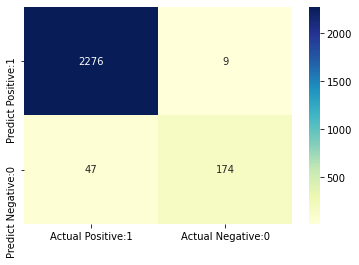

In [164]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Classification metrices 

In [165]:
from sklearn.metrics import classification_report

print(classification_report(y_test5, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2285
         1.0       0.95      0.79      0.86       221

    accuracy                           0.98      2506
   macro avg       0.97      0.89      0.92      2506
weighted avg       0.98      0.98      0.98      2506



In [166]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [167]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9777


In [168]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0223


In [169]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9961


In [170]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9798


In [171]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9798


In [172]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0492


 Hyperparameter Optimization using GridSearch CV 
 (giúp tìm ra cách tối ưu para của svm)

link:https://cafedev.vn/tu-hoc-ml-dieu-chinh-sieu-tham-so-svm-bang-gridsearchcv-ml/#3_Su_dung_GridsearchCV

In [174]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(x_train5, y_train5)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [175]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9786


Parameters that give the best results : 

 {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=10, gamma=0.2)


In [177]:
grid_pred = grid_search.predict(x_test5)

In [178]:
print(classification_report(y_test5, grid_pred)) 

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2285
         1.0       0.95      0.82      0.88       221

    accuracy                           0.98      2506
   macro avg       0.97      0.91      0.94      2506
weighted avg       0.98      0.98      0.98      2506



In [180]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(x_test5, y_test5)))

GridSearch CV score on test set: 0.9804


# KNN

link: https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learn/notebook

link: https://www.kaggle.com/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed

In [7]:
pip install mlxtend  

Note: you may need to restart the kernel to use updated packages.


In [36]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction

#Basic Data Science and ML Pipeline
## OSEMN Pipeline
* O - Obtaining our data
* S - Scrubbing / Cleaning our data
* E - Exploring / Visualizing our data will allow us to find patterns and trends
* M - Modeling our data will give us our predictive power as a wizard
* N - INterpreting our data

In [37]:
#Loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### basic EDA and statistical analysis

In [38]:
diabetes_data.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [39]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


câu hỏi đặt ra là các giá min có hợp của các cột Glucose,BloodPressure,SkinThickness,Insulin,BMI có hợp lý hay không và ta thấy là ko hợp lý vì đây là các chỉ số cần phải có. Nên có thể suy ra đây là các giá trị '0'không hợp lý 

cách tốt hơn là thay các giá trị bằng '0' bằng giá trị Nan , và sau đó thay thế bằng các giá trị phù hợp hơn 

In [41]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [42]:
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


để điền các giá trị Nan này,cần phải hiểu phân phối dữ liệu

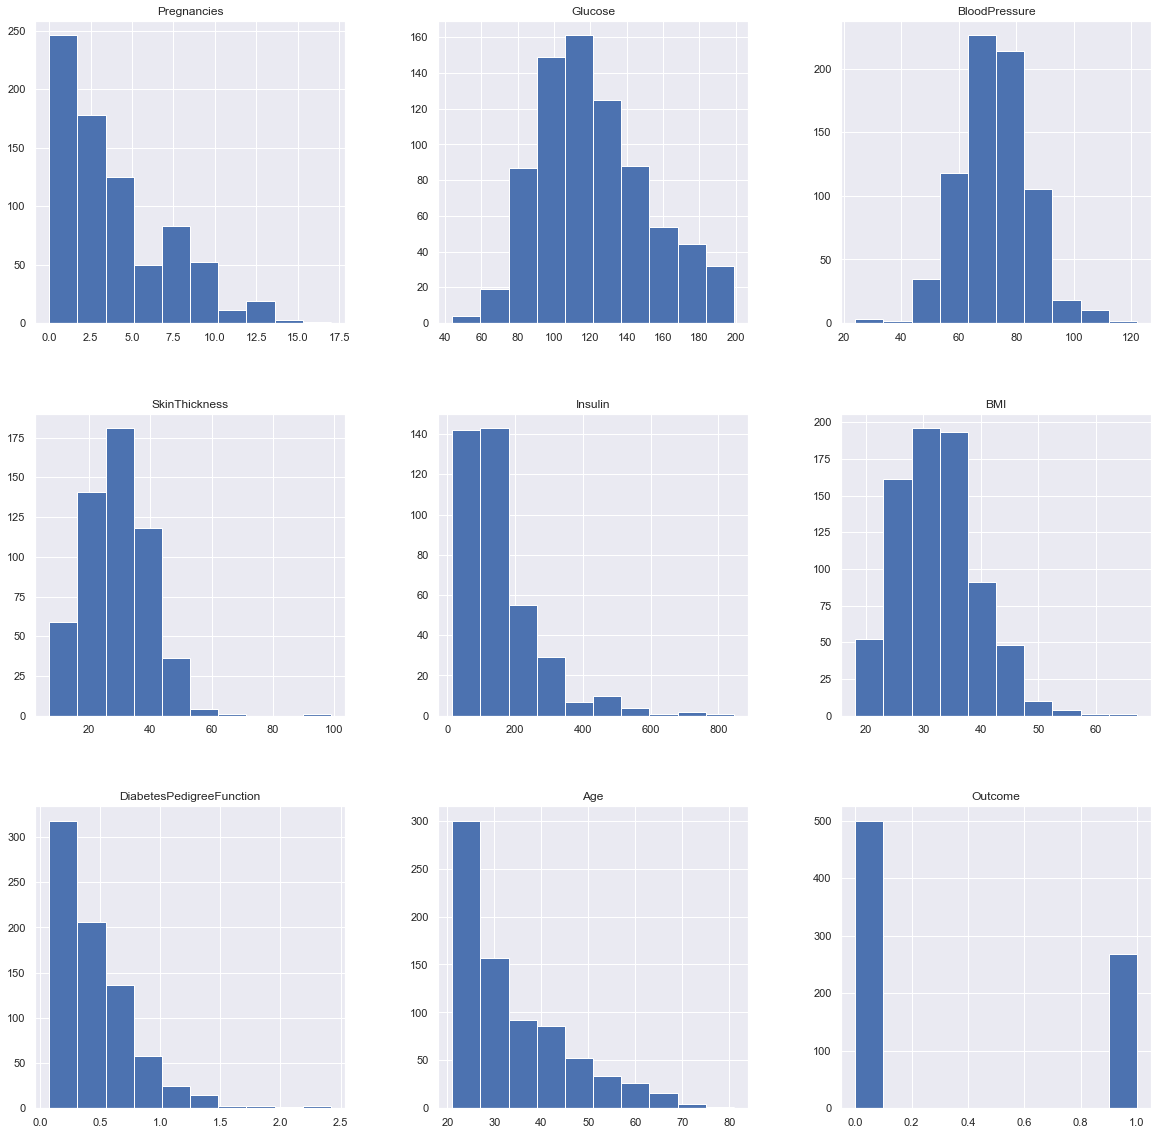

In [43]:
p = diabetes_data_copy.hist(figsize = (20,20))

biểu đồ trên giúp ta nhìn ra được nên fillna các giá trị mean hay median là tốt cho từng feature

In [44]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].mean(), inplace = True)


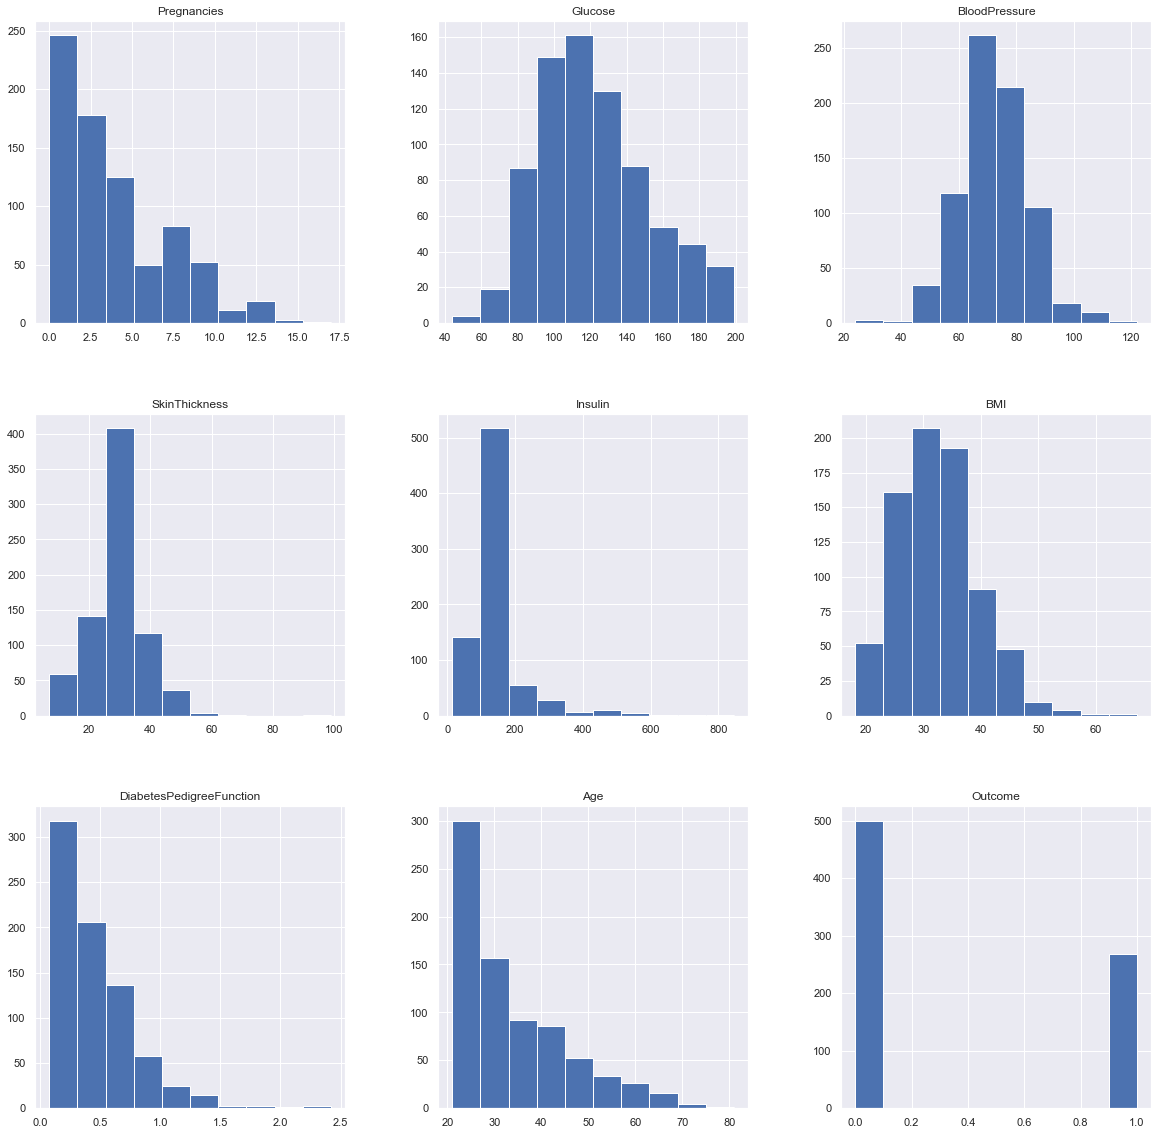

In [45]:
p = diabetes_data_copy.hist(figsize = (20,20))

In [46]:
diabetes_data.shape

(768, 9)

In [47]:
sns.countplot(y=diabetes_data.dtypes ,data=diabetes_data)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

TypeError: data type 'Pregnancies' not understood

In [ ]:
## null count analysis
import missingno as msno
p=msno.bar(diabetes_data)

In [ ]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(diabetes_data,figsize=(25, 25))

In [ ]:
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')


In [ ]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

## Scaling the data

In [48]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [49]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.548980,5.484909,-0.020496


In [50]:
y = diabetes_data_copy.Outcome

In [51]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [52]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [53]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [54]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.5625 % and k = [11]


In [96]:
print(kmeans.cluster_centers_)

NameError: name 'kmeans' is not defined

## result visualisation

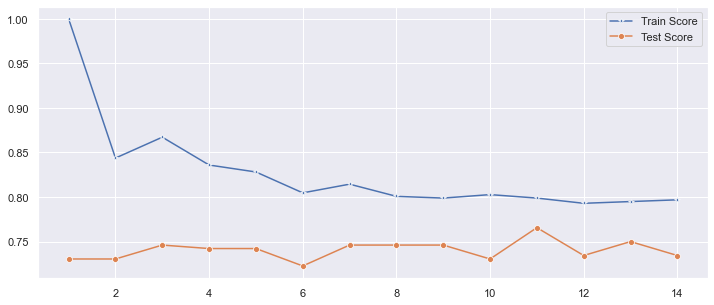

In [55]:
plt.figure(figsize=(12,5))
p=sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p=sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [59]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

In [60]:
## trying to plot decision boundary 

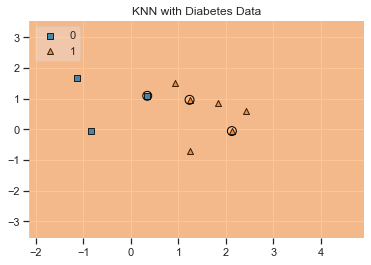

In [61]:
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

In [62]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,142,25,167
1,35,54,89
All,177,79,256


Text(0.5, 12.5, 'Predicted label')

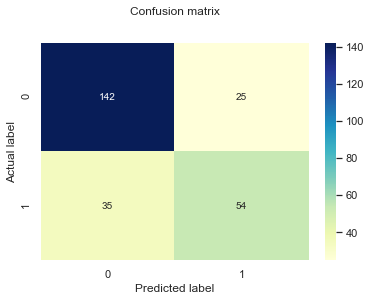

In [63]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [64]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



In [65]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7708853238265002
Best Parameters: {'n_neighbors': 28}


In [66]:
y6= knn_cv.predict(X_test)

In [67]:
y6

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [68]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?`
print("Accuracy:",metrics.accuracy_score(y_test, y6))

Accuracy: 0.77734375


In [90]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [89]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.548980,5.484909,-0.020496


In [95]:
y7=knn_cv.predict([[-1.141852,-1.206162,-0.695306,0.670643,-0.540642,1.548980,0.468492,-1.041549]])
y7

array([0], dtype=int64)

## Phương pháp elbow(dành cho thuật toán K-means)

In [3]:
# buoc 1 nhap cac thu vien bat buoc
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  

In [4]:
#buoc 2: tao va truc quan hoa du lieu

In [9]:
#Creating the data 
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8]) 
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3]) 
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2) 
X

array([[3, 5],
       [1, 4],
       [1, 5],
       [2, 6],
       [1, 5],
       [6, 8],
       [6, 6],
       [6, 7],
       [5, 6],
       [6, 7],
       [7, 1],
       [8, 2],
       [9, 1],
       [8, 2],
       [9, 3],
       [9, 2],
       [8, 3]])

In [30]:
X.shape[0]

17

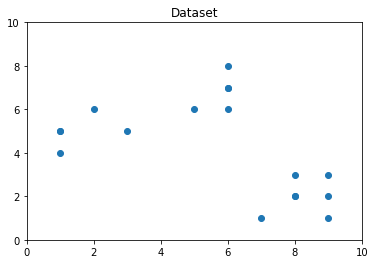

In [12]:
#Visualizing the data 
plt.plot() 
plt.xlim([0, 10]) 
plt.ylim([0, 10]) 
plt.title('Dataset') 
plt.scatter(x1, x2) 
plt.show() 

từ hình trên có thấy thấy tối ưu là 3 cụm nhưng cũng chưa chắc là câu trả lời đúng. bây giờ chúng ta cần xác định 2 yếu tố:
* độ méo(distortions)
* Quán tính(inertias)

In [31]:
#Bước 3: Xây dựng mô hình phân cụm và tính toán các giá trị của Biến dạng và Quán tính
DistortionsS = [] #khai báo bien do meo
inertias = [] #hkai bao bien quan tinh
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
    # tinh hàm biến dạng
    # khoang cach tới toàn bộ centroids
    distortions= cdist(X, kmeanModel.cluster_centers_, 'euclidean')
    # khoang cach đến centroid gần nhất
    min_distance = np.min(distortions,axis=1)
            #distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0])
    sum_min_d = np.sum(min_distance)/X.shape[0]
    DistortionsS.append(sum_min_d)
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum_min_d
    mapping2[k] = kmeanModel.inertia_ 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))

1 : 3.4577032384495703
2 : 1.768741357340567
3 : 0.8819889697423957
4 : 0.7587138847606587
5 : 0.663521281240035
6 : 0.580097449143775
7 : 0.5093717077076825
8 : 0.4442520441076937
9 : 0.3137254901960784


In [33]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

1 : 217.64705882352948
2 : 68.42857142857142
3 : 16.228571428571428
4 : 12.695238095238095
5 : 9.600000000000001
6 : 7.583333333333333
7 : 5.083333333333333
8 : 4.166666666666667
9 : 3.666666666666667


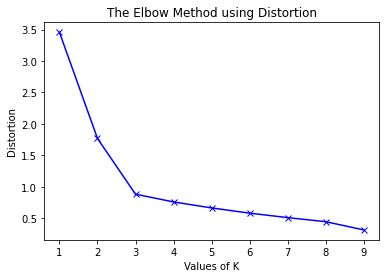

In [35]:
plt.plot(K, DistortionsS , 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

Để xác định số lượng cụm tối ưu, chúng ta phải chọn giá trị của k tại “khuỷu tay” tức là điểm mà sau đó biến dạng / quán tính bắt đầu giảm theo kiểu tuyến tính. Do đó đối với dữ liệu đã cho, chúng tôi kết luận rằng số cụm tối ưu cho dữ liệu là 3.

# K-means

link: https://colab.research.google.com/drive/1izGP15oreJ9zFZ4qi8jz9jaK3nuhb8a2?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
# loading the data from csv file to a Pandas DataFrame
cd = pd.read_csv('Mall_Customers.csv')

In [4]:
cd.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
cd.shape

(200, 5)

In [6]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
cd.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Segmentation using Annual income and Spending Score

In [86]:
X = customer_data.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

chọn số lượng clusters

In [87]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [88]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30259.657207285458,
 25011.839349156595,
 21850.16528258562,
 19672.07284901432]

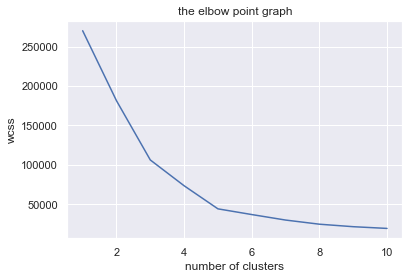

In [89]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('the elbow point graph')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

cluster = 5 là giá trị hợp lý

In [90]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)

Y=kmeans.fit_predict(X)

In [91]:
Y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

5 cluster [0,1,2,3,4]

In [92]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [93]:
cd['cluster']=Y
cd.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


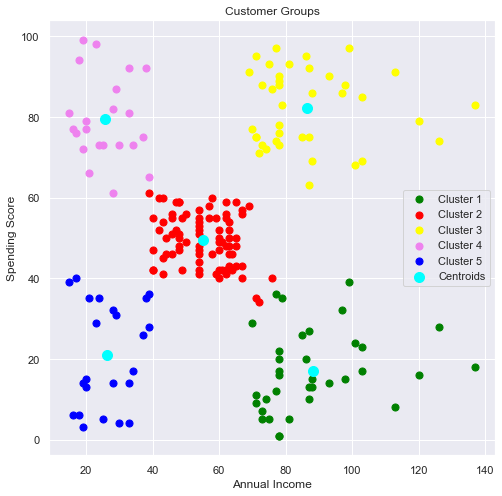

In [94]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

vừa rồi là ví dụ về thuật toán k means sử dụng 2 biến annual income và spending score

## Segmentation using Age , Annual Income and Spending Score

link: https://www.kaggle.com/kushal1996/customer-segmentation-k-means-analysis/notebook

In [95]:
cd.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [100]:
X2 = cd.iloc[:,2:5].values
X2

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [108]:
wcss2 = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10,random_state=42)
  kmeans.fit(X2)

  wcss2.append(kmeans.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [109]:
wcss2

[308812.7800000001,
 212840.16982097193,
 143342.75157170597,
 104366.151455562,
 75378.76464074482,
 58302.40630860365,
 51118.949931647316,
 44312.468812077226,
 40894.989782139775,
 37468.51571576572]

In [57]:
X2

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

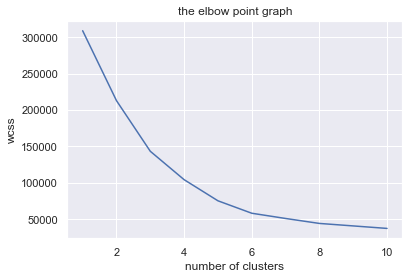

In [111]:
sns.set()
plt.plot(range(1,11),wcss2)
plt.title('the elbow point graph')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

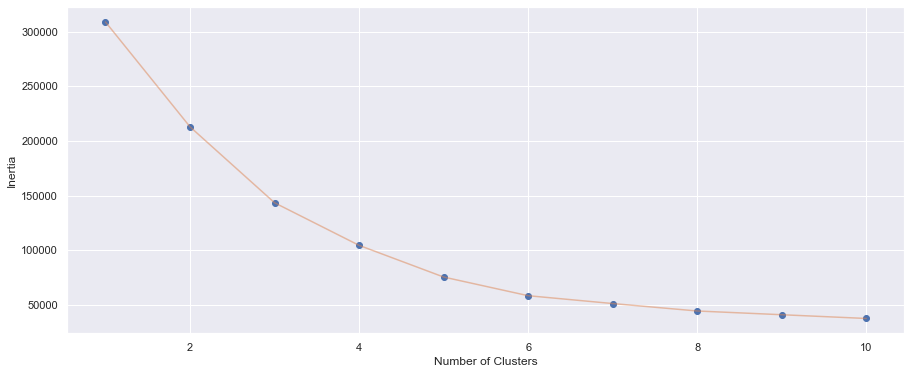

In [112]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , wcss2 , 'o')
plt.plot(np.arange(1 , 11) , wcss2, '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [114]:
kmeans2 = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10, 
                         random_state= 42) )
Y2 = kmeans2.fit_predict(X2)
Y2


array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 4,
       0, 3, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 1, 4, 1, 5, 1, 5, 1, 5, 1,
       4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1])

In [117]:
centroids2 = kmeans2.cluster_centers_
centroids2

array([[44.31818182, 25.77272727, 20.27272727],
       [32.69230769, 86.53846154, 82.12820513],
       [56.34090909, 53.70454545, 49.38636364],
       [25.27272727, 25.72727273, 79.36363636],
       [27.        , 56.65789474, 49.13157895],
       [41.68571429, 88.22857143, 17.28571429]])

In [119]:
labels3 = kmeans2.labels_
labels3

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 4,
       0, 3, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 1, 4, 1, 5, 1, 5, 1, 5, 1,
       4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1])

In [121]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [122]:
import plotly as py
import plotly.graph_objs as go

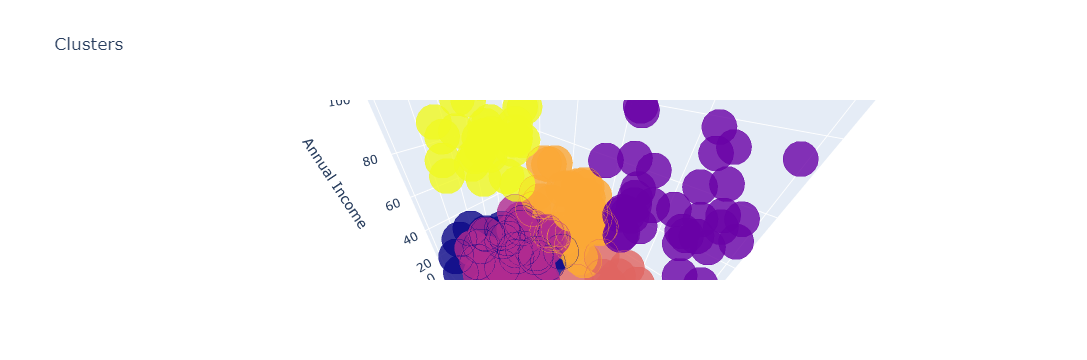

In [126]:
cd['label3'] =  labels3
trace1 = go.Scatter3d(
    x= cd['Age'],
    y= cd['Spending Score (1-100)'],
    z= cd['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = cd['label3'], 
        size= 20,
        line=dict(
            color= cd['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

## https://www.youtube.com/watch?v=I3Oo__t_mks (miAI)

# Naive Bayes

link: https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

In [1]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [2]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [3]:
weather

['Sunny',
 'Sunny',
 'Overcast',
 'Rainy',
 'Rainy',
 'Rainy',
 'Overcast',
 'Sunny',
 'Sunny',
 'Rainy',
 'Sunny',
 'Overcast',
 'Overcast',
 'Rainy']

In [4]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [5]:
# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print ("Temp:",temp_encoded)
print ("Play:",label)

Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


Bây giờ kết hợp cả hai tính năng (thời tiết và nhiệt độ) trong một biến duy nhất (danh sách các bộ giá trị).

In [6]:
features=list(zip(weather_encoded,temp_encoded))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [7]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild 
print ("Predicted Value:", predicted)

Predicted Value: [1]


 1 cho biết rằng người chơi có thể 'chơi'.

## Naive Bayes with Multiple Labels

In [8]:
import pandas as pd

In [9]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

In [10]:
# print the names of the 13 features
print ("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print ("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [11]:
data=pd.DataFrame({
'alcohol':wine.data[:,0],
'malic_acid':wine.data[:,1],
'alcalinity_of_ash':wine.data[:,2],
'magnesium':wine.data[:,3],
'total_phenols':wine.data[:,3],
'flavanoids':wine.data[:,3],
'nonflavanoid_phenols':wine.data[:,3],
'proanthocyanins':wine.data[:,3],   
'color_intensity':wine.data[:,3], 
'hue':wine.data[:,3], 
'od280/od315_of_diluted_wines':wine.data[:,3], 
'proline':wine.data[:,3], 
'label':wine.target
})
data.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,15.6,15.6,15.6,15.6,15.6,15.6,15.6,15.6,0
1,13.20,1.78,2.14,11.2,11.2,11.2,11.2,11.2,11.2,11.2,11.2,11.2,0
2,13.16,2.36,2.67,18.6,18.6,18.6,18.6,18.6,18.6,18.6,18.6,18.6,0
3,14.37,1.95,2.50,16.8,16.8,16.8,16.8,16.8,16.8,16.8,16.8,16.8,0
4,13.24,2.59,2.87,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,0


In [12]:
wine.data.shape

(178, 13)

In [13]:
print (wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [14]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [15]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [16]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [17]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


In [18]:
y_pred

array([0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 2, 1,
       0, 2, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 2, 1, 0, 0,
       0, 2, 2, 0, 1, 1, 2, 0, 0, 2])

## link: https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python#5.-Import-libraries-

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [2]:
data = 'adult.csv'

df = pd.read_csv(data, header=None, sep=',\s')

<ipython-input-2-e25b2590b104>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(data, header=None, sep=',\s')


In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [5]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [9]:
# check missing values in categorical variables

df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [10]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         377

Now, we can see that there are several variables like workclass, occupation and native_country which contain missing values. Generally, the missing values are coded as NaN and python will detect them with the usual command of df.isnull().sum().

But, in this case the missing values are coded as ?. Python fail to detect these as missing values because it do not consider ? as missing values. So, I have to replace ? with NaN so that Python can detect these missing values.

I will explore these variables and replace ? with NaN


In [11]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [12]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [13]:
df['workclass'].replace('?',np.NaN,inplace=True)

In [14]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

I will adopt similar approach with occupation and native_country column.

In [15]:
df['occupation'].replace('?', np.NaN, inplace=True)
df['native_country'].replace('?', np.NaN, inplace=True)

In [16]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [17]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


In [18]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [19]:
df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [20]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [21]:
x8 = df.drop(['income'], axis=1)

y8 = df['income']

In [22]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

x8_train, x8_test, y8_train, y8_test = train_test_split(x8, y8, test_size = 0.3, random_state = 0)

In [23]:
x8_train.shape, x8_test.shape

((22792, 14), (9769, 14))

In [24]:
x8_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
32098,45,Private,170871,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,60,United-States
25206,47,State-gov,108890,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,1831,0,38,United-States
23491,48,Private,187505,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States
12367,29,Private,145592,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Guatemala
7054,23,Private,203003,7th-8th,4,Never-married,Craft-repair,Not-in-family,White,Male,0,0,25,Germany


Feature Engineering
* Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

First, I will display the categorical and numerical variables again separately.

In [25]:
# check data types in X_train

x8_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [26]:
categorical = [col for col in x8_train.columns if x8_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [27]:
# print percentage of missing values in the categorical variables in training set

x8_train[categorical].isnull().count()

workclass         22792
education         22792
marital_status    22792
occupation        22792
relationship      22792
race              22792
sex               22792
native_country    22792
dtype: int64

In [28]:
numerical = [col for col in x8_train.columns if x8_train[col].dtypes != 'O']

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [29]:
# print categorical variables with missing data

for col in categorical:
    if x8_train[col].isnull().mean()>0:
        print(col, (x8_train[col].isnull().mean()))

workclass 0.055984555984555984
occupation 0.05607230607230607
native_country 0.018164268164268166


In [30]:
# impute missing categorical variables with most frequent value

for df2 in [x8_train, x8_test]:
    df2['workclass'].fillna(x8_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(x8_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(x8_train['native_country'].mode()[0], inplace=True)  

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [31]:
x8_train[categorical]

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany
...,...,...,...,...,...,...,...,...
13123,Local-gov,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
19648,Private,10th,Never-married,Farming-fishing,Unmarried,White,Male,United-States
9845,Private,Some-college,Separated,Sales,Own-child,White,Female,United-States
10799,Local-gov,Doctorate,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


In [50]:
# import category encoders
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder

In [51]:
# encode remaining variables with one-hot encoding
#encoder = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,3,5,6,7,8,9,13])],remainder='passthrough' )



In [52]:
#x8_train =pd.DataFrame( encoder.fit_transform(x8_train).toarray())

#x8_test =pd.DataFrame(encoder.fit_transform(x8_test).toarray())

In [53]:
#x8_train.head()

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,45.0,170871.0,9.0,7298.0,0.0,60.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,47.0,108890.0,9.0,1831.0,0.0,38.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,48.0,187505.0,10.0,0.0,0.0,50.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,29.0,145592.0,9.0,0.0,0.0,40.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,23.0,203003.0,4.0,0.0,0.0,25.0


In [54]:
x8_test.head()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,27.0,177119.0,10.0,0.0,0.0,44.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,27.0,216481.0,13.0,0.0,0.0,40.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,25.0,256263.0,12.0,0.0,0.0,40.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,46.0,147640.0,3.0,0.0,1902.0,40.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,45.0,172822.0,7.0,0.0,2824.0,76.0


In [55]:
#pip uninstall category-encoders

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#conda install -c conda-forge category_encoders

In [32]:
# import category encoders

import category_encoders as ce

In [33]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

x8_train = encoder.fit_transform(x8_train)

x8_test = encoder.transform(x8_test)

C:\Users\Admin\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [34]:
x8_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#cols = x8_train.columns

In [39]:

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x8_train = scaler.fit_transform(x8_train)

x8_test = scaler.transform(x8_test)

In [40]:
x8_train

array([[ 0.4 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.5 , -1.  ,  1.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.55,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [-0.7 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.4 , -1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.6 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [43]:
x8_train = pd.DataFrame(x8_train, columns=[cols])

In [44]:
x8_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
x8_test = pd.DataFrame(x8_test, columns=[cols])

In [47]:
x8_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.323136,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.656361,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.253496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.042564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

In [49]:
# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(x8_train, y8_train)

GaussianNB()

Predict the results

In [50]:
y8_pred = gnb.predict(x8_test)

y8_pred

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

In [53]:
from sklearn.metrics import accuracy_score

accuracy_score(y8_test, y8_pred)

0.8082710615211383

Compare the train-set and test-set accuracy.
Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [54]:
y8_pred_train = gnb.predict(x8_train)

y8_pred_train

array(['>50K', '<=50K', '>50K', ..., '<=50K', '>50K', '<=50K'],
      dtype='<U5')

In [56]:
accuracy_score(y8_train, y8_pred_train)

0.8067304317304317

Check for overfitting and underfitting

In [58]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(x8_train, y8_train)))

print('Test set score: {:.4f}'.format(gnb.score(x8_test, y8_test)))

Training set score: 0.8067
Test set score: 0.8083


 Training set score là 0,8067 trong khi Test set score là 0,8083. Vì vậy, không có dấu hiệu của việc trang bị quá nhiều.

Compare model accuracy with null accuracy
So, the model accuracy is 0.8083. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [60]:
# check class distribution in test set

y8_test.value_counts()

<=50K    7407
>50K     2362
Name: income, dtype: int64

Chúng ta có thể thấy rằng số lần xuất hiện của lớp thường xuyên nhất là 7407. Vì vậy, chúng ta có thể tính null accuracy bằng cách chia 7407 cho tổng số lần xuất hiện.

In [61]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))

null_accuracy

0.7582147609786057

Chúng ta có thể thấy rằng accuracy score của mô hình của chúng tôi là 0,8083 nhưng null accuracy là 0,7582. Vì vậy, chúng ta có thể kết luận rằng mô hình Phân loại Gaussian Naive Bayes của chúng tôi đang làm rất tốt trong việc dự đoán các nhãn lớp.

In [63]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y8_test, y8_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5999 1408]
 [ 465 1897]]

True Positives(TP) =  5999

True Negatives(TN) =  1897

False Positives(FP) =  1408

False Negatives(FN) =  465


<AxesSubplot:>

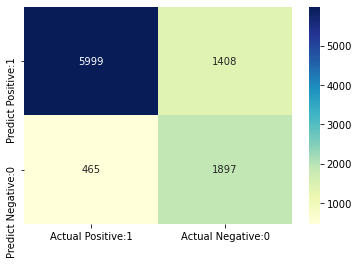

In [64]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [66]:
from sklearn.metrics import classification_report

print(classification_report(y8_test, y8_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      7407
        >50K       0.57      0.80      0.67      2362

    accuracy                           0.81      9769
   macro avg       0.75      0.81      0.77      9769
weighted avg       0.84      0.81      0.82      9769



# Principal Component Analysis (PCA)

##  link : https://miai.vn/2021/04/22/principal-component-analysis-pca-tuyet-chieu-giam-chieu-du-lieu/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
# Đọc dữ liệu từ sklearn
cancer_set = load_breast_cancer()

# Chuyển thành DataFrame
cancer_data = pd.DataFrame(data=cancer_set ['data'], columns=cancer_set['feature_names'])

cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Nhìn qua dữ liệu chúng ta thấy range của mỗi cột khá lệch nhau

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit vào dữ liệu
scaler.fit(cancer_data)

# Thực hiện transform scale
scale_cancer_data = scaler.transform(cancer_data)

In [6]:
from sklearn.decomposition import PCA

# Khởi tạo đối tượng PCA với số comp = 2
my_pca = PCA (n_components = 2 )

# Fit vào data
my_pca.fit(scale_cancer_data)

# Thực hiện transform 
pca_scale_cancer_data = my_pca.transform(scale_cancer_data)

Bây giờ chúng ta sẽ kiểm tra xem có thực sự dữ liệu của chúng ta đã giảm chiều không bằng cách in ra 2 món này:

In [7]:
print("Dữ liệu gốc: ", scale_cancer_data.shape)
# Dữ liệu gốc:  (569, 30)

print("Dữ liệu sau PCA:" , pca_scale_cancer_data.shape)
# Dữ liệu sau PCA: (569, 2)

Dữ liệu gốc:  (569, 30)
Dữ liệu sau PCA: (569, 2)


In [18]:
pd.DataFrame(scale_cancer_data,columns=cancer_set['feature_names'])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [20]:
pd.DataFrame(pca_scale_cancer_data)

,0,1
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [21]:
cancer_set['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

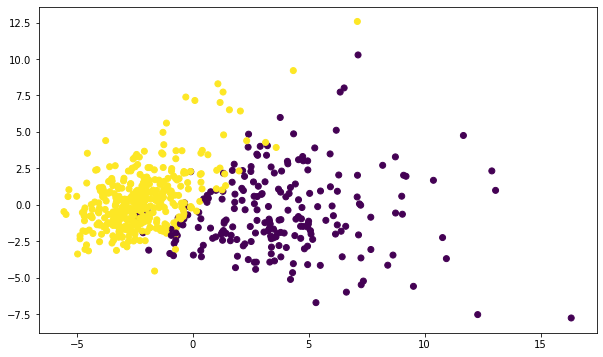

In [22]:
plt.figure(figsize = (10,6))
# Thành phần comp số 1
pca_1 = pca_scale_cancer_data[:, 0]
# Thành phần comp số 2
pca_2 = pca_scale_cancer_data[:, 1]

# Vẽ đồ thị
plt.scatter(x=pca_1, y = pca_2, c = cancer_set['target'])

In [23]:
my_pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [24]:
pca_comp = pd.DataFrame(data=my_pca.components_, columns=cancer_data.columns)
pca_comp.head() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


## link: https://www.kaggle.com/nirajvermafcb/principal-component-analysis-with-scikit-learn

In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
df=pd.read_csv('data1.csv') 
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [29]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [30]:
df.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


In [31]:
# chuyen temperture sang do C
Fahrenheit=df['temperature']
#Converting it into the list so we can apply lambda function
F=Fahrenheit.tolist()


In [33]:
C= map(lambda x: (float(5)/9)*(x-32),F)
Celsius=(list(C))

In [34]:
temperature_celsius=pd.Series(Celsius)

In [35]:
df['temperature']= temperature_celsius
df['temperature']
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,22.088889,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,22.088889,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,22.088889,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,22.088889,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,22.088889,0,0,8,17


In [47]:
x9 = df.iloc[:,1:].drop('date',axis=1)  # all rows, all the features and no labels
y9 = df.iloc[:, 0]  # all rows, label only

In [48]:
x9.head()

,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,61211,4,0,0,22.088889,0,0,8,17
1,62414,4,0,0,22.088889,0,0,8,17
2,63015,4,0,0,22.088889,0,0,8,17
3,63616,4,0,0,22.088889,0,0,8,17
4,64217,4,0,0,22.088889,0,0,8,17


Text(0.5, 1.0, 'Correlation between different fearures')

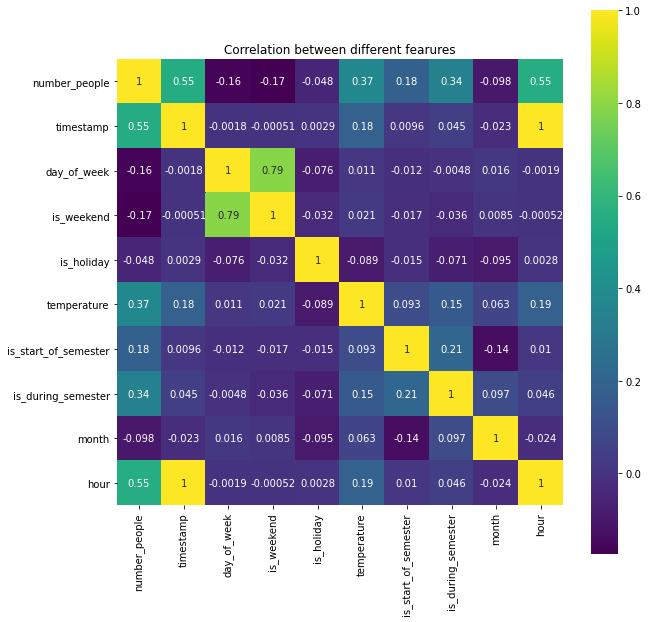

In [49]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [50]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x9=scaler.fit_transform(x9)
x9

array([[ 0.63654993,  0.50956119, -0.6280507 , ..., -1.39393832,
         0.16260365,  0.70911589],
       [ 0.68623792,  0.50956119, -0.6280507 , ..., -1.39393832,
         0.16260365,  0.70911589],
       [ 0.71106127,  0.50956119, -0.6280507 , ..., -1.39393832,
         0.16260365,  0.70911589],
       ...,
       [ 0.94008862,  1.01036016,  1.59222814, ...,  0.71739186,
        -1.28875789,  1.0068423 ],
       [ 0.96515979,  1.01036016,  1.59222814, ...,  0.71739186,
        -1.28875789,  1.0068423 ],
       [ 0.99010704,  1.01036016,  1.59222814, ...,  0.71739186,
        -1.28875789,  1.0068423 ]])

In [52]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(x9)

array([[-1.28179131e+00, -2.98429411e-02,  2.85138940e-01, ...,
         6.68195153e-01,  8.77591924e-01, -5.23662677e-02],
       [-1.31549841e+00, -2.95331402e-02,  2.92627611e-01, ...,
         6.69624504e-01,  8.77568835e-01, -1.72330086e-02],
       [-1.33233795e+00, -2.93783684e-02,  2.96368834e-01, ...,
         6.70338585e-01,  8.77557300e-01,  3.19018637e-04],
       ...,
       [-1.32560806e+00, -1.75259122e+00,  3.94786301e-01, ...,
        -1.19181184e+00, -4.39243812e-01, -4.63899746e-02],
       [-1.34261571e+00, -1.75243490e+00,  3.98564874e-01, ...,
        -1.19109063e+00, -4.39255462e-01, -2.86627192e-02],
       [-1.35953931e+00, -1.75227935e+00,  4.02324772e-01, ...,
        -1.19037298e+00, -4.39267055e-01, -1.10230778e-02]])

In [53]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([2.30714837e-01, 2.00194539e-01, 1.45337162e-01, 1.28787313e-01,
       1.01704569e-01, 9.27779113e-02, 7.74133019e-02, 2.29679261e-02,
       1.02439309e-04])

Không có câu trả lời nào cho bạn biết với xác suất 1 số thành phần chính xác là bao nhiêu. Nó là ứng dụng cụ thể. Tuy nhiên, có một kinh nghiệm sau đây mà bạn có thể sử dụng. Bạn vẽ biểu đồ tỷ lệ phương sai được giải thích và chọn một số thành phần "nắm bắt" ít nhất 95% phương sai.

ValueError: shape mismatch: objects cannot be broadcast to a single shape

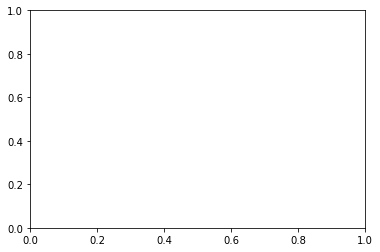

In [79]:
plt.figure(figsize=(6, 4))
range = np.arange(0,7)
plt.bar(range, explained_variance, alpha=0.5, align='center',
            label='individual explained variance',)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

Text(0, 0.5, 'cumulative explained variance')

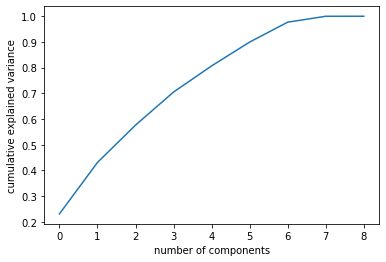

In [61]:
pca = PCA().fit(x9)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

theo hình trên t có thể thấy được là 7 Principal Component có phương sai ~ 95%

In [83]:
pca=PCA(n_components=7)
x9_new=pca.fit_transform(x9)
x9_new

array([[-1.28179131, -0.02984294,  0.28513894, ..., -0.42200784,
         2.11792565,  0.66819515],
       [-1.31549841, -0.02953314,  0.29262761, ..., -0.42261643,
         2.11163307,  0.6696245 ],
       [-1.33233795, -0.02937837,  0.29636883, ..., -0.42292048,
         2.1084894 ,  0.67033858],
       ...,
       [-1.32560806, -1.75259122,  0.3947863 , ..., -0.199138  ,
        -0.51428129, -1.19181184],
       [-1.34261571, -1.7524349 ,  0.39856487, ..., -0.19944508,
        -0.51745635, -1.19109063],
       [-1.35953931, -1.75227935,  0.40232477, ..., -0.19975064,
        -0.52061571, -1.19037298]])

In [84]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.23071484, 0.20019454, 0.14533716, 0.12878731, 0.10170457,
       0.09277791, 0.0774133 ])

Text(0, 0.5, 'cumulative explained variance')

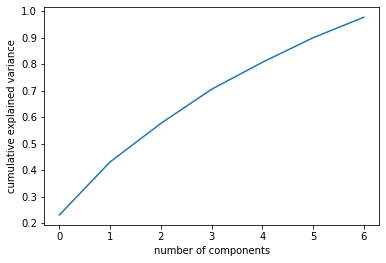

In [85]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [86]:
from sklearn.model_selection import train_test_split
x9_train, x9_test, y9_train, y9_test = train_test_split(x9_new, y9, test_size=0.2, random_state=1)
x9_train.shape

(49747, 7)

In [87]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [88]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(x9_train, y9_train)
    scores.append(model.score(x9_test, y9_test))
print(scores)    

[0.9050715963560707, 0.9090694674596359, 0.9106625470952857, 0.9125810631841904, 0.9130401554514936, 0.9132344562524806, 0.9126594140498803, 0.913657674223839, 0.9140206536510723, 0.9142337762138866, 0.9141656956208201, 0.9142830477531788, 0.9137258221667754, 0.9144853839179955, 0.914730548904716, 0.9148497251535992, 0.9143997008165928, 0.9146296273811465, 0.9144935493622837]


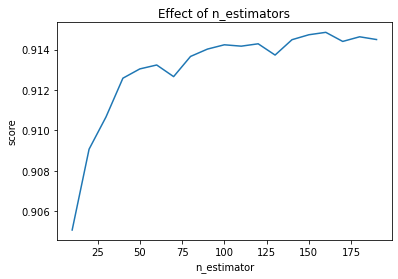

In [89]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

# Neural network (MLPclassifier and MLPregression)

# Time series 

link: https://www.kaggle.com/satishgunjal/tutorial-time-series-analysis-and-forecasting/notebook#Time-Series-Forecasting-

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf, pacf
#adfuller: Dickey-Fuller tăng cường
#ACF: Chức năng tương quan tự động
#PACF: Chức năng tương quan tự động một phần
from statsmodels.tsa.arima_model import ARIMA #ARIMA: Mô hình trung bình động tích hợp tự động phục hồi ARIMA (p, d, q) 
import statsmodels.api as sm #sm.tsa.seasonal.seasonal_decompose: Để phân rã chuỗi thời gian
from pylab import rcParams # rcParams: Để thay đổi các thuộc tính matplotlib như kích thước hình


mô hình thống kê: Sử dụng các lớp và chức năng mô-đun mô-đun thống kê để phân tích và dự báo chuỗi thời gian adfuller: Dickey-Fuller tăng cường ACF: Chức năng tương quan tự động PACF: Chức năng tương quan tự động một phần ARIMA: Mô hình trung bình động tích hợp tự động phục hồi ARIMA (p, d, q) sm.tsa.seasonal.seasonal_decompose: Để phân tích chuỗi thời gian rcParams: Để thay đổi các thuộc tính matplotlib như kích thước hình

In [3]:
rcParams['figure.figsize'] = 10, 6

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/Time_Series_AirPassengers.csv')
print('Shape of the data= ', df.shape)
print('Column datatypes= \n',df.dtypes)
df

Shape of the data=  (144, 2)
Column datatypes= 
 Month         object
Passengers     int64
dtype: object


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
df['Month'] = pd.to_datetime(df.Month)
df = df.set_index(df.Month)
df.drop('Month',axis=1,inplace=True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


## Time Series Characteristics

* Trend 

Text(0.5, 1.0, 'Trend of the Time series')

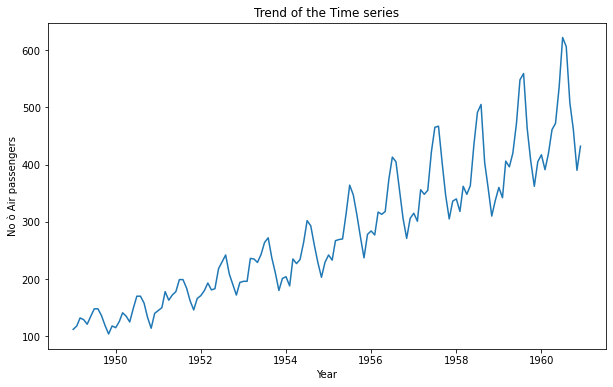

In [6]:
plt.figure(figsize=(10,6))
plt.plot(df)
plt.xlabel('Year')
plt.ylabel('No ò Air passengers')
plt.title('Trend of the Time series')

Như bạn có thể thấy từ biểu đồ trên, số lượng hành khách có xu hướng tăng lên hàng năm.

Phương sai Trong biểu đồ trên, bạn có thể thấy rõ rằng sự thay đổi cũng đang tăng lên theo cấp độ của chuỗi. Bạn sẽ thấy trong phần sau của bài tập này cách chúng tôi xử lý phương sai để tăng tính ổn định của chuỗi.

In [7]:
# To plot the seasonality we are going to create a temp dataframe and add columns for Month and Year values
df_temp = df.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month
df_temp

,Passengers,Year,Month
Month,,,
1949-01-01,112,1949,1
1949-02-01,118,1949,2
1949-03-01,132,1949,3
1949-04-01,129,1949,4
1949-05-01,121,1949,5
...,...,...,...
1960-08-01,606,1960,8
1960-09-01,508,1960,9
1960-10-01,461,1960,10


<AxesSubplot:title={'center':'Seasonality of the Time Series'}, xlabel='Month', ylabel='Passengers'>

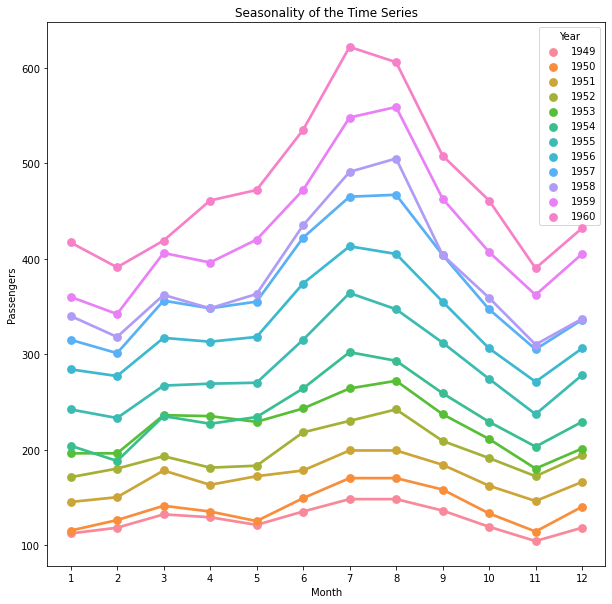

In [8]:
# Stacked line plot
plt.figure(figsize=(10,10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='Month',y='Passengers',hue='Year',data=df_temp)

Từ biểu đồ trên, chúng ta có thể nói rằng hàng năm vào tháng 7 chúng ta quan sát thấy số lượng hành khách tối đa và số lượng hành khách tối thiểu tương tự trong tháng 11.

* phân rã của chuỗi thời gian

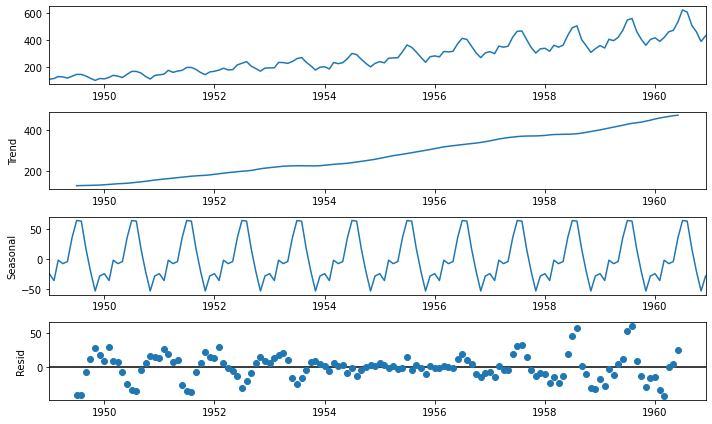

In [9]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive') 
fig = decomposition.plot()

## Time Series Analysis 

Vì vậy, chuỗi thời gian của chúng ta có các đặc điểm về phương sai, xu hướng và tính thời vụ. Trong quá trình phân tích, chúng tôi sẽ thử nhiều kỹ thuật để tạo chuỗi thời gian cố định và ghi lại điểm số cố định cho mỗi phương pháp. Cuối cùng, chúng tôi sẽ chọn phương pháp dễ dàng cho phép biến đổi nghịch đảo dễ dàng và cho điểm số đứng yên tốt nhất.

In [10]:
def stationarity_test(timeseries):
    # Get rolling statistics for window = 12 i.e. yearly statistics
    rolling_mean = timeseries.rolling(window = 12).mean()
    rolling_std = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistic
    plt.figure(figsize= (10,6))
    plt.xlabel('Years')
    plt.ylabel('No of Air Passengers')    
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color= 'blue', label= 'Original')
    plt.plot(rolling_mean, color= 'green', label= 'Rolling Mean')
    plt.plot(rolling_std, color= 'red', label= 'Rolling Std')   
    plt.legend()
    plt.show()
    
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
    print(df_output)

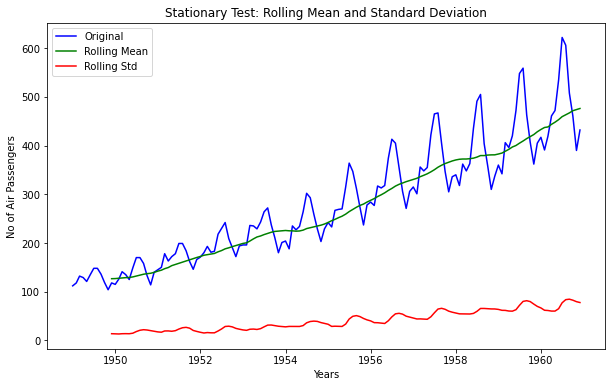

Results of Dickey-Fuller Test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [11]:
# Lets test the stationarity score with original series data
stationarity_test(df)

### Convert Non-Stationary Data to Stationary Data

Differencing :
To transform the series using 'Differencing' we will use the diff() method of pandas. A benefit of using the Pandas function, in addition to requiring less code, is that it maintains the date-time information for the differenced series

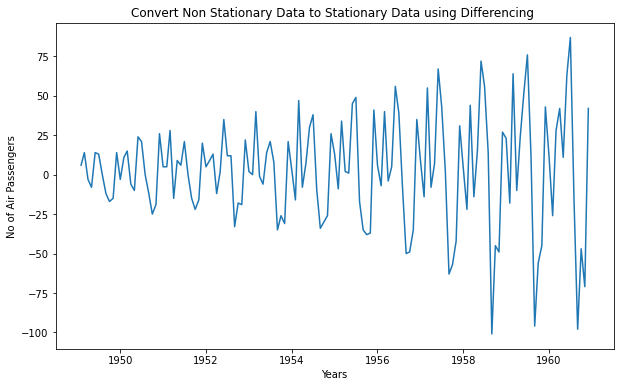

In [12]:
df_diff = df.diff(periods = 1) # First order differencing
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')    
plt.title('Convert Non Stationary Data to Stationary Data using Differencing ')
plt.plot(df_diff)

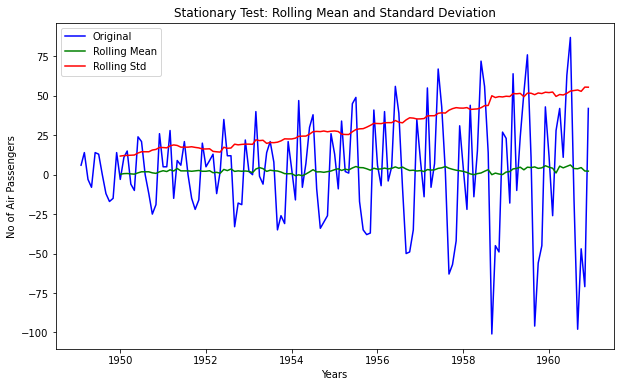

Results of Dickey-Fuller Test
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [13]:
df_diff.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_diff)

Transformation
* Since variance is proportional to the levels, we are going to use the log transformation.

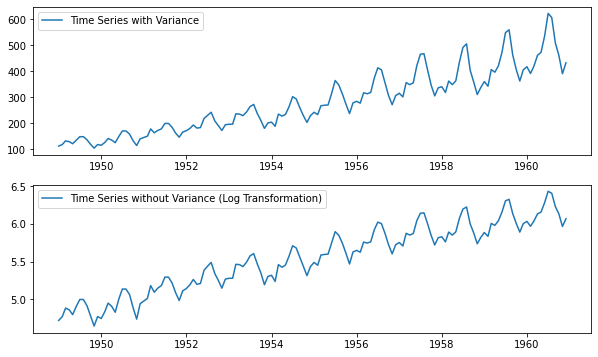

In [14]:
df_log = np.log(df) # log co so e 

plt.subplot(2,1,1)
plt.plot(df, label= 'Time Series with Variance')
plt.legend()
plt.subplot(2,1,2)
plt.plot(df_log, label='Time Series without Variance (Log Transformation)')
plt.legend()  
plt.show()

Since log transformation has removed the variance from series, lets use this transformed data hence forward. Note that, Since we are using log transformation, we can use the exponential of the series to get the original scale back.

    df = exp(df_log)
Let cross-check the differencing method scores with this log transformed data again.

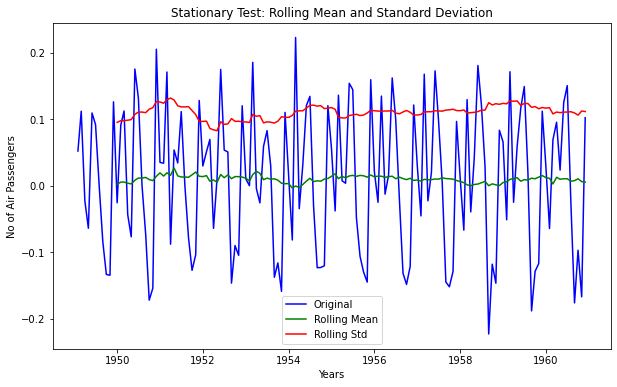

Results of Dickey-Fuller Test
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [15]:
df_log_diff = df_log.diff(periods = 1) # First order differencing

df_log_diff.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_log_diff)

The rolling mean and standard deviation values are okay now. The test statistic is smaller than the 10% critical values but since p-value is greater than 0.05 it is not a stationary series.

Let's also check with Moving Average technique…

Moving Average
Since we have time series data from 1 Jan 1949 to 1 Dec 1960, we will define a yearly window for moving average. Window size = 12. Note that we are going to use Log transformed data.

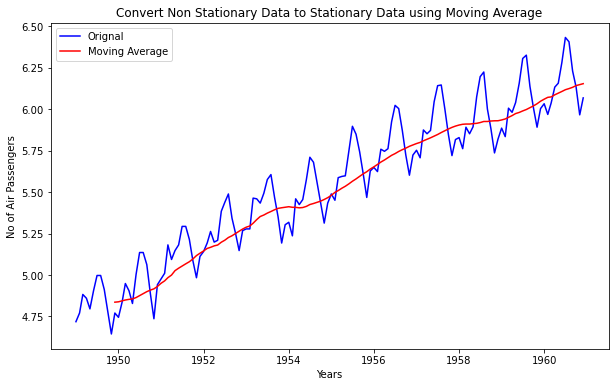

In [16]:
df_log_moving_avg = df_log.rolling(window = 12).mean()
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')    
plt.title('Convert Non Stationary Data to Stationary Data using Moving Average')
plt.plot(df_log, color= 'blue', label='Orignal')
plt.plot(df_log_moving_avg, color= 'red', label='Moving Average')
plt.legend()

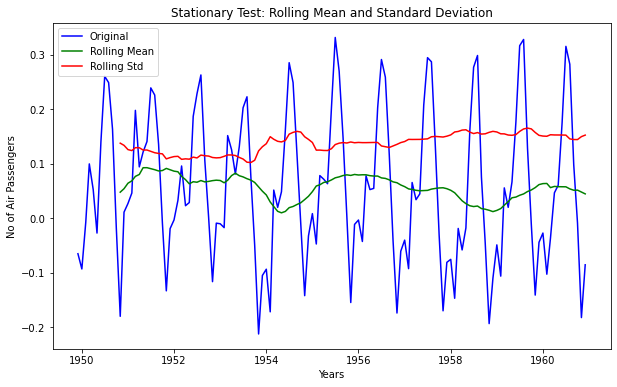

Results of Dickey-Fuller Test
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [17]:
df_log_moving_avg_diff = df_log - df_log_moving_avg
df_log_moving_avg_diff.dropna(inplace = True)
stationarity_test(df_log_moving_avg_diff)

As expected now we are able to see some real improvements. p-value is less than 0.05 that means our series is stationary, but we can only say this with 95% of confidence, as test statistics is less than 5% critical value.

In order to increase the stationarity of the series lets try to use 'Weighted Moving Average' technique

Weighted Moving Average (WMA)
Here we are going to use exponentially weighted moving average with parameter ‘halflife = 12’. This parameter defines the amount of exponential decay. This is just an assumption here and would depend largely on the business domain.

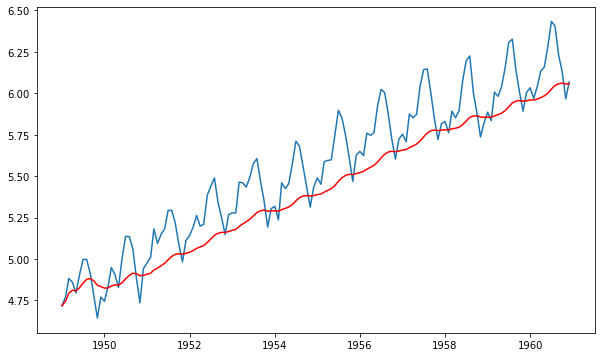

In [18]:
df_log_weighted_avg = df_log.ewm(halflife = 12).mean()
plt.plot(df_log)
plt.plot(df_log_weighted_avg, color = 'red')

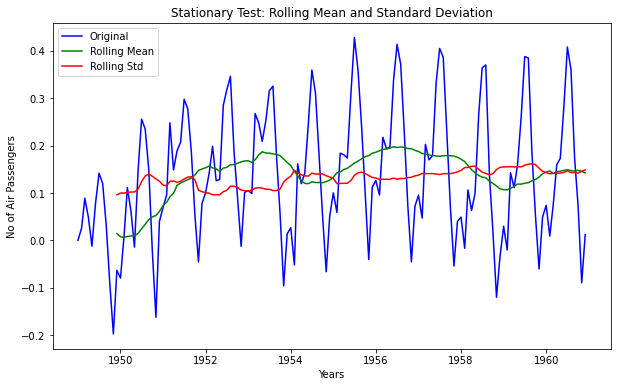

Results of Dickey-Fuller Test
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [19]:
df_log_weighted_avg_diff = df_log - df_log_weighted_avg
stationarity_test(df_log_weighted_avg_diff)

Decomposition of Time Series: 
Let's now use the decomposition technique to deconstruct the log transformed time series data, so that we can check the stationarity using residual data.

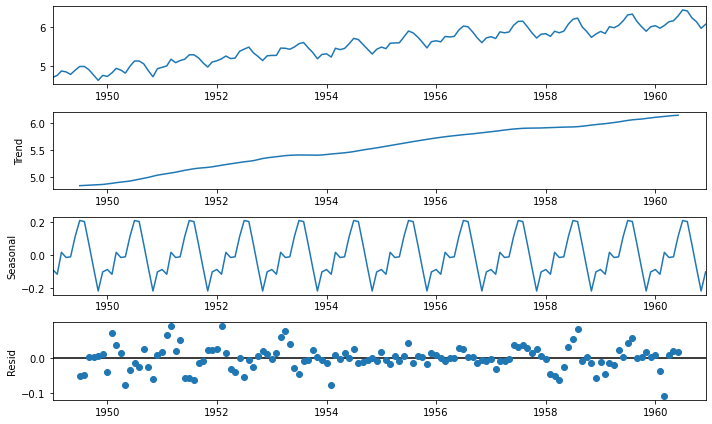

In [20]:
decomposition = sm.tsa.seasonal_decompose(df_log,period =12)
fig = decomposition.plot()

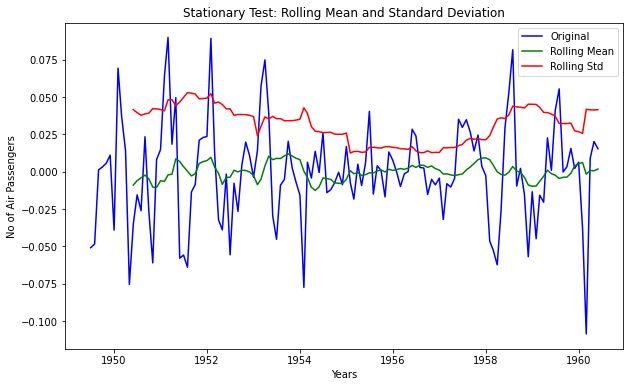

Results of Dickey-Fuller Test
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [21]:
df_log_residual = decomposition.resid
df_log_residual.dropna(inplace = True)
stationarity_test(df_log_residual)

## Forecasting

In [22]:
lag_acf = acf(df_log_diff, nlags=20)
lag_pacf = pacf(df_log_diff, nlags=20, method='ols')


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [23]:
lag_acf

array([ 1.        ,  0.19975134, -0.12010433, -0.15077204, -0.32207432,
       -0.08397453,  0.02577843, -0.11096075, -0.33672146, -0.11558631,
       -0.10926704,  0.20585223,  0.84142998,  0.21508704, -0.13955394,
       -0.11599576, -0.27894284, -0.05170646,  0.01245814, -0.1143576 ,
       -0.33717439])

In [24]:
lag_pacf

array([ 1.        ,  0.20081508, -0.17368194, -0.09901213, -0.33527437,
        0.00872185, -0.07990745, -0.21923579, -0.5421352 , -0.22848913,
       -0.64775301, -0.53828661,  0.59971786,  0.29995642, -0.10992268,
        0.14878637, -0.00321881,  0.01892684, -0.14268478,  0.07089814,
       -0.15566902])

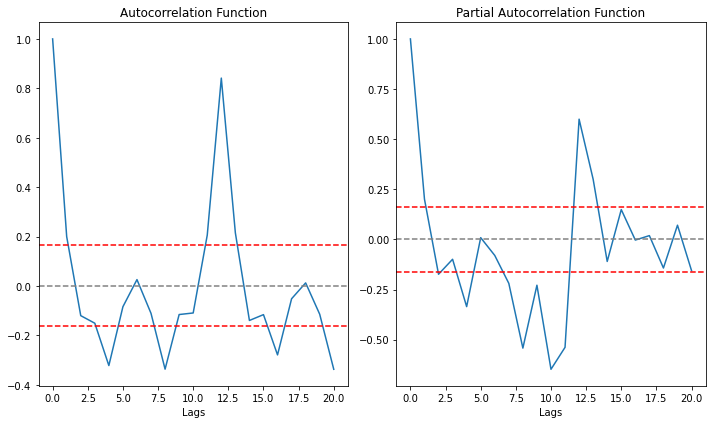

In [25]:
# Plot ACF: 
plt.subplot(1,2,1) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

From above graph its clear that p=2 and q=2. Now we have the ARIMA parameters values, lets make 3 different ARIMA models considering individual as well as combined effects. We will also print the RSS(Residual Sum of Square) metric for each. Please note that here RSS is for the values of residuals and not actual series.

AR Model :
Since 'q' is MA model parameter we will keep its value as '0'.

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Text(0.5, 1.0, 'AR Model, RSS: 1.5023')

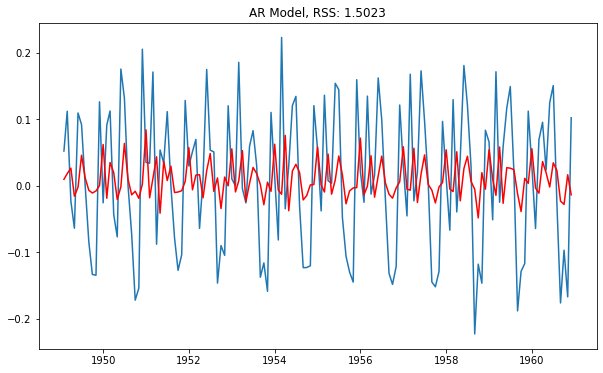

In [26]:
# freq = 'MS' > The frequency of the time-series MS = calendar month begin
# The (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters to use
model = ARIMA(df_log, order=(2, 1, 0), freq = 'MS')  
results_AR = model.fit(disp= -1)# If disp < 0 convergence information will not be printed
plt.plot(df_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('AR Model, RSS: %.4f'% sum((results_AR.fittedvalues - df_log_diff['Passengers'])**2))

MA Model:
Since 'p' is AR model parameter we will keep its value as '0'.

Text(0.5, 1.0, 'MA Model, RSS: 1.4721')

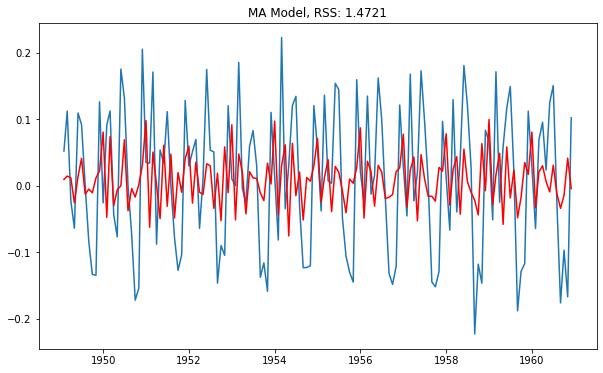

In [27]:
model = ARIMA(df_log, order=(0, 1, 2), freq = 'MS')  
results_MA = model.fit(disp=-1)  
plt.plot(df_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('MA Model, RSS: %.4f'% sum((results_MA.fittedvalues-df_log_diff['Passengers'])**2))

Combined Model

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Text(0.5, 1.0, 'Combined Model, RSS: 1.0292')

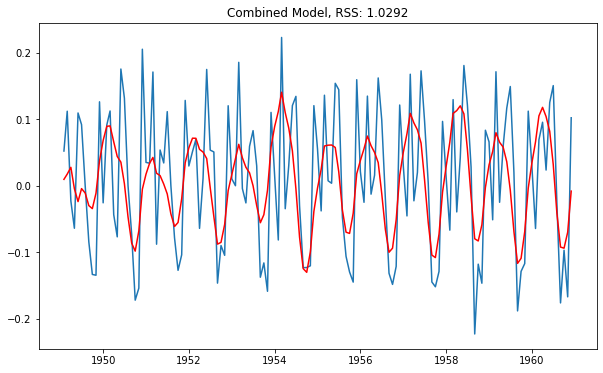

In [28]:
model = ARIMA(df_log, order=(2, 1, 2), freq = 'MS')  
results_ARIMA = model.fit(disp=-1)  
plt.plot(df_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('Combined Model, RSS: %.4f'% sum((results_ARIMA.fittedvalues-df_log_diff['Passengers'])**2))

Here we can see that the AR and MA models have almost the same RSS score but combined is significantly better. So we will go ahead with combined ARIMA model and use it for predictions.

Prediction and Reverse Transformation
* We will create a separate series of predicted values using ARIMA model
* Reverse transform the predicted values to get the original scale back
* Compare the predicted values with original values and plot them


In [29]:
# Create a separate series of predicted values
predictions_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

print('Total no of predictions: ', len(predictions_diff))
predictions_diff.head()

Total no of predictions:  143


Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [30]:
predictions_diff_cumsum = predictions_diff.cumsum()
predictions_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [31]:
predictions_log = pd.Series(df_log['Passengers'].iloc[0], index=df_log.index) # Series of base number

In [32]:
predictions_log

Month
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.718499
1949-04-01    4.718499
1949-05-01    4.718499
                ...   
1960-08-01    4.718499
1960-09-01    4.718499
1960-10-01    4.718499
1960-11-01    4.718499
1960-12-01    4.718499
Length: 144, dtype: float64

In [33]:
predictions_log = predictions_log.add(predictions_diff_cumsum,fill_value=0)
predictions_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

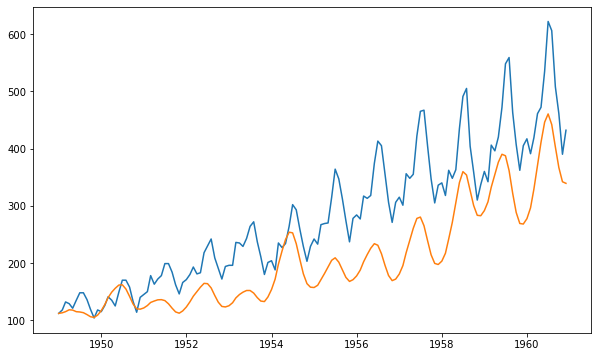

In [34]:
predictions = np.exp(predictions_log)
plt.plot(df)
plt.plot(predictions)

In [35]:
df_predictions =pd.DataFrame(predictions, columns=['Predicted Values'])
pd.concat([df,df_predictions],axis =1)

,Passengers,Predicted Values
Month,,
1949-01-01,112,112.000000
1949-02-01,118,113.078123
1949-03-01,132,115.073416
1949-04-01,129,118.301989
1949-05-01,121,117.768366
...,...,...
1960-08-01,606,441.886960
1960-09-01,508,402.906382
1960-10-01,461,366.753924


Future Forecasting

* We have data from 1 Jan 1949 to 1 Dec 1960. 12 years of data with passenger number observation for each month i.e. 144 total observations.
* If we want to forecast for next 5 years or 60 months then, ‘end’ count will be > 144 + 60 = 204.
* We are going to use statsmodels plot_predict() method for it

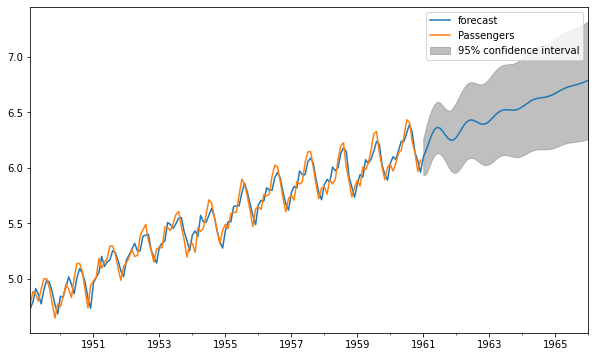

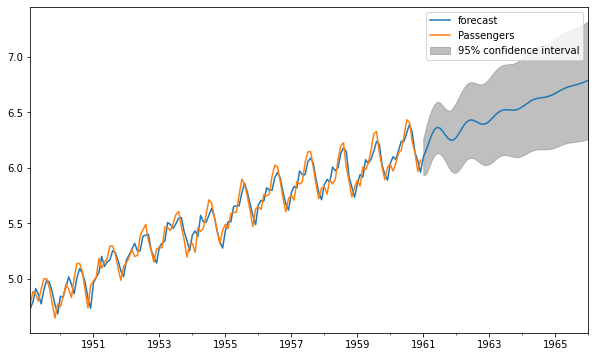

In [36]:
results_ARIMA.plot_predict(start = 1, end= 204) 

In [39]:
# Forecasted values in original scale will be


In [40]:
forecast_values_log_scale = results_ARIMA.forecast(steps = 60)
forecast_values_log_scale

(array([6.09553393, 6.15281403, 6.22442965, 6.292411  , 6.34164714,
        6.36359358, 6.35784683, 6.33139303, 6.29597541, 6.26447717,
        6.24738331, 6.25025178, 6.27275843, 6.30940318, 6.35151497,
        6.38988658, 6.41727382, 6.43011055, 6.42906691, 6.41842492,
        6.4045616 , 6.39403622, 6.39183091, 6.40019513, 6.41833702,
        6.44295417, 6.46937444, 6.49293994, 6.51024126, 6.5198904 ,
        6.52267586, 6.52112395, 6.51864536, 6.51853701, 6.52311935,
        6.53322374, 6.54812884, 6.56591572, 6.58410322, 6.60036553,
        6.61313279, 6.62192793, 6.62737801, 6.63093142, 6.63438703,
        6.63938001, 6.64696522, 6.65739859, 6.67015343, 6.6841427 ,
        6.69806645, 6.71077919, 6.7215775 , 6.73034001, 6.73749828,
        6.74386397, 6.75037342, 6.75782613, 6.76668704, 6.77699846]),
 array([0.08384711, 0.1074946 , 0.11568692, 0.11702772, 0.11703494,
        0.11744015, 0.11762247, 0.1177871 , 0.1202416 , 0.1273604 ,
        0.13870958, 0.15118791, 0.16157811, 0.

In [41]:
forecast_values_original_scale = np.exp(forecast_values_log_scale[0])
forecast_values_original_scale

array([443.87097678, 470.03822986, 504.93497199, 540.45479359,
       567.73067141, 580.3280719 , 577.0026328 , 561.93884606,
       542.38463652, 525.56673267, 516.65911795, 518.14326657,
       529.93715552, 549.71676625, 573.36067687, 595.78899992,
       612.33151362, 620.24251145, 619.59553804, 613.03676973,
       604.59668396, 598.26645084, 596.94854054, 601.96248703,
       612.9828896 , 628.2600499 , 645.08006631, 660.46222916,
       671.98852118, 678.50401709, 680.39659478, 679.34150288,
       677.65977932, 677.58635516, 680.69841518, 687.61132323,
       697.93699818, 710.46217982, 723.50193702, 735.36393541,
       744.81270654, 751.3923338 , 755.49866105, 758.18803208,
       760.81256967, 764.62078539, 770.44264712, 778.52304178,
       788.51658009, 799.62486416, 810.83651315, 821.21026847,
       830.12599914, 837.43195448, 843.44802705, 848.83427719,
       854.37774756, 860.7689623 , 868.43004612, 877.43112017])

In [42]:
forecast_date_range= pd.date_range("1961-01-01", "1965-12-01", freq="MS")
forecast_date_range

DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
               '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01',
               '1963-01-01', '1963-02-01', '1963-03-01', '1963-04-01',
               '1963-05-01', '1963-06-01', '1963-07-01', '1963-08-01',
               '1963-09-01', '1963-10-01', '1963-11-01', '1963-12-01',
               '1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01', '1964-11-01', '1964-12-01',
               '1965-01-01', '1965-02-01', '1965-03-01', '1965-04-01',
               '1965-05-01', '1965-06-01', '1965-07-01', '1965-08-01',
      

In [43]:
df_forecast =pd.DataFrame(forecast_values_original_scale, columns=['Forecast'])
df_forecast

,Forecast
0,443.870977
1,470.038230
2,504.934972
3,540.454794
4,567.730671
5,580.328072
6,577.002633
7,561.938846
8,542.384637
9,525.566733


In [44]:
df_forecast['Month'] = forecast_date_range
df_forecast[['Month', 'Forecast']]

,Month,Forecast
0,1961-01-01,443.870977
1,1961-02-01,470.038230
2,1961-03-01,504.934972
3,1961-04-01,540.454794
4,1961-05-01,567.730671
5,1961-06-01,580.328072
6,1961-07-01,577.002633
7,1961-08-01,561.938846
8,1961-09-01,542.384637
9,1961-10-01,525.566733


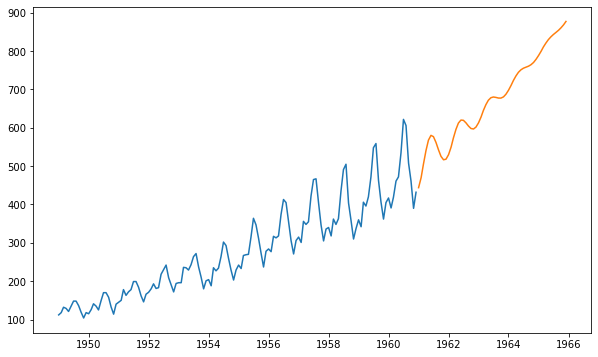

In [56]:
plt.plot(df)
plt.plot(df_forecast['Month'],df_forecast['Forecast'])

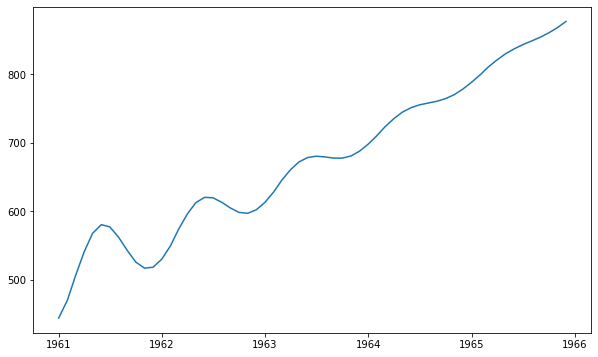

In [55]:
plt.plot(df_forecast['Month'],df_forecast['Forecast'])